# **1. READING THE DATA**


In order to read files in Google Colabatory, first please add the needed csv files into your personal Goole Drive. If it is not enough and code is not working, please copy the file path into the file paths below.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 

from google.colab import drive

purchases_file = "/content/drive/MyDrive/Purchases.csv"
product_catalog_file = "/content/drive/MyDrive/Product_Catalog.csv"
labels_file = "/content/drive/MyDrive/Labels.csv"

data_frame_purchases = pd.read_csv(purchases_file)
data_frame_products = pd.read_csv(product_catalog_file)
data_frame_labels = pd.read_csv(labels_file)

In [2]:
data_frame_purchases

,Unnamed: 0,purchase id,product id,time
0,0,0,1445,101
1,1,0,792,132
2,2,0,1312,157
3,3,0,3257,80
4,4,0,935,88
...,...,...,...,...
155082,158373,19997,2416,72
155083,158375,19998,796,45
155084,158376,19998,1446,49
155085,158377,19999,1369,133


In [3]:
data_frame_purchases

,Unnamed: 0,purchase id,product id,time
0,0,0,1445,101
1,1,0,792,132
2,2,0,1312,157
3,3,0,3257,80
4,4,0,935,88
...,...,...,...,...
155082,158373,19997,2416,72
155083,158375,19998,796,45
155084,158376,19998,1446,49
155085,158377,19999,1369,133


In [4]:
data_frame_products

,Unnamed: 0,id,category,sub category,product,price,unit,weight,calories
0,0,410,Baby and child,Baby food,AH Biologisch Knijpfruit appel banaan aardbei ...,0.89,"90 gPrijs per KG € 9,89",90 Gram,51.0
1,1,451,Baby and child,Baby food,Organix Knijpfruit appel aardbei quinoa 12+m,1.25,"100 gPrijs per KG € 12,50",100 Gram,47.0
2,2,468,Baby and child,Baby food,Organix Knijpfruit haver appel banaan 12+m,1.29,"100 gPrijs per KG € 12,90",100 Gram,62.0
3,3,430,Baby and child,Baby food,AH Biologisch Ontbijtpap meergranen 12+m,1.49,"200 gPrijs per KG € 7,45",200 Gram,350.0
4,4,472,Baby and child,Baby food,Nestlé Pyjamapapje biscuit 6m+,2.99,"3 x 250 mlPrijs per LT € 3,99",3 Stuks (piece). 750 Milliliter,89.0
...,...,...,...,...,...,...,...,...,...
1650,1650,3608,"Potatoes, vegetables, fruit",Potatoes,AH Toscaanse aardappelpartjes,0.99,"450 gPrijs per KG € 2,20",450 Gram,97.0
1651,1651,3576,"Potatoes, vegetables, fruit",Potatoes,AH Ovenfriet zoete aardappel,2.49,"400 gPrijs per KG € 6,23",400 Gram,108.0
1652,1652,3589,"Potatoes, vegetables, fruit",Potatoes,AH Zoete aardappelblokjes,3.29,"400 gPrijs per KG € 8,23",400 Gram,108.0
1653,1653,3628,"Potatoes, vegetables, fruit",Potatoes,AH Vastkokend,1.79,"1 kgPrijs per KG € 1,79",1 Kilogram,88.0


In [5]:
data_frame_products.drop('Unnamed: 0', axis=1, inplace=True)
data_frame_purchases.drop('Unnamed: 0', axis=1, inplace=True)

Firstly we read our data sets and check if everything is good with them. We observed that there is unnamed column which basically specifies index of the observation. We do not need this column so we drop it.
Now we will check out for missing data in a data sets and we will check for outliers as well.

#**2. DATA CLEANING**


In [6]:
data_frame_labels.isna().sum()

purchase id    0
amount         0
dtype: int64

In [7]:
data_frame_purchases.isna().sum()

purchase id    0
product id     0
time           0
dtype: int64

In [8]:
nan_counts_products = data_frame_products.isna().sum()
nan_counts_products

id                0
category          0
sub category      0
product           0
price             0
unit              0
weight           16
calories        262
dtype: int64

There are some missing data in products data set, but they appear in weight and calories columns, which we are not really planning to use in our analysis, so we can leave them as they are and not care about them for now.

In [9]:
data_frame_purchases.describe()

,purchase id,product id,time
count,155087.000000,155087.000000,155087.000000
mean,10003.617234,2016.796405,101.376608
std,5774.043340,1017.103136,66.124910
min,0.000000,93.000000,6.000000
25%,5028.000000,1178.000000,49.000000
50%,10000.000000,2009.000000,90.000000
75%,14986.000000,2923.000000,137.000000
max,19999.000000,3860.000000,1026.000000


array([[<Axes: title={'center': 'purchase id'}>,
        <Axes: title={'center': 'product id'}>],
       [<Axes: title={'center': 'time'}>, <Axes: >]], dtype=object)

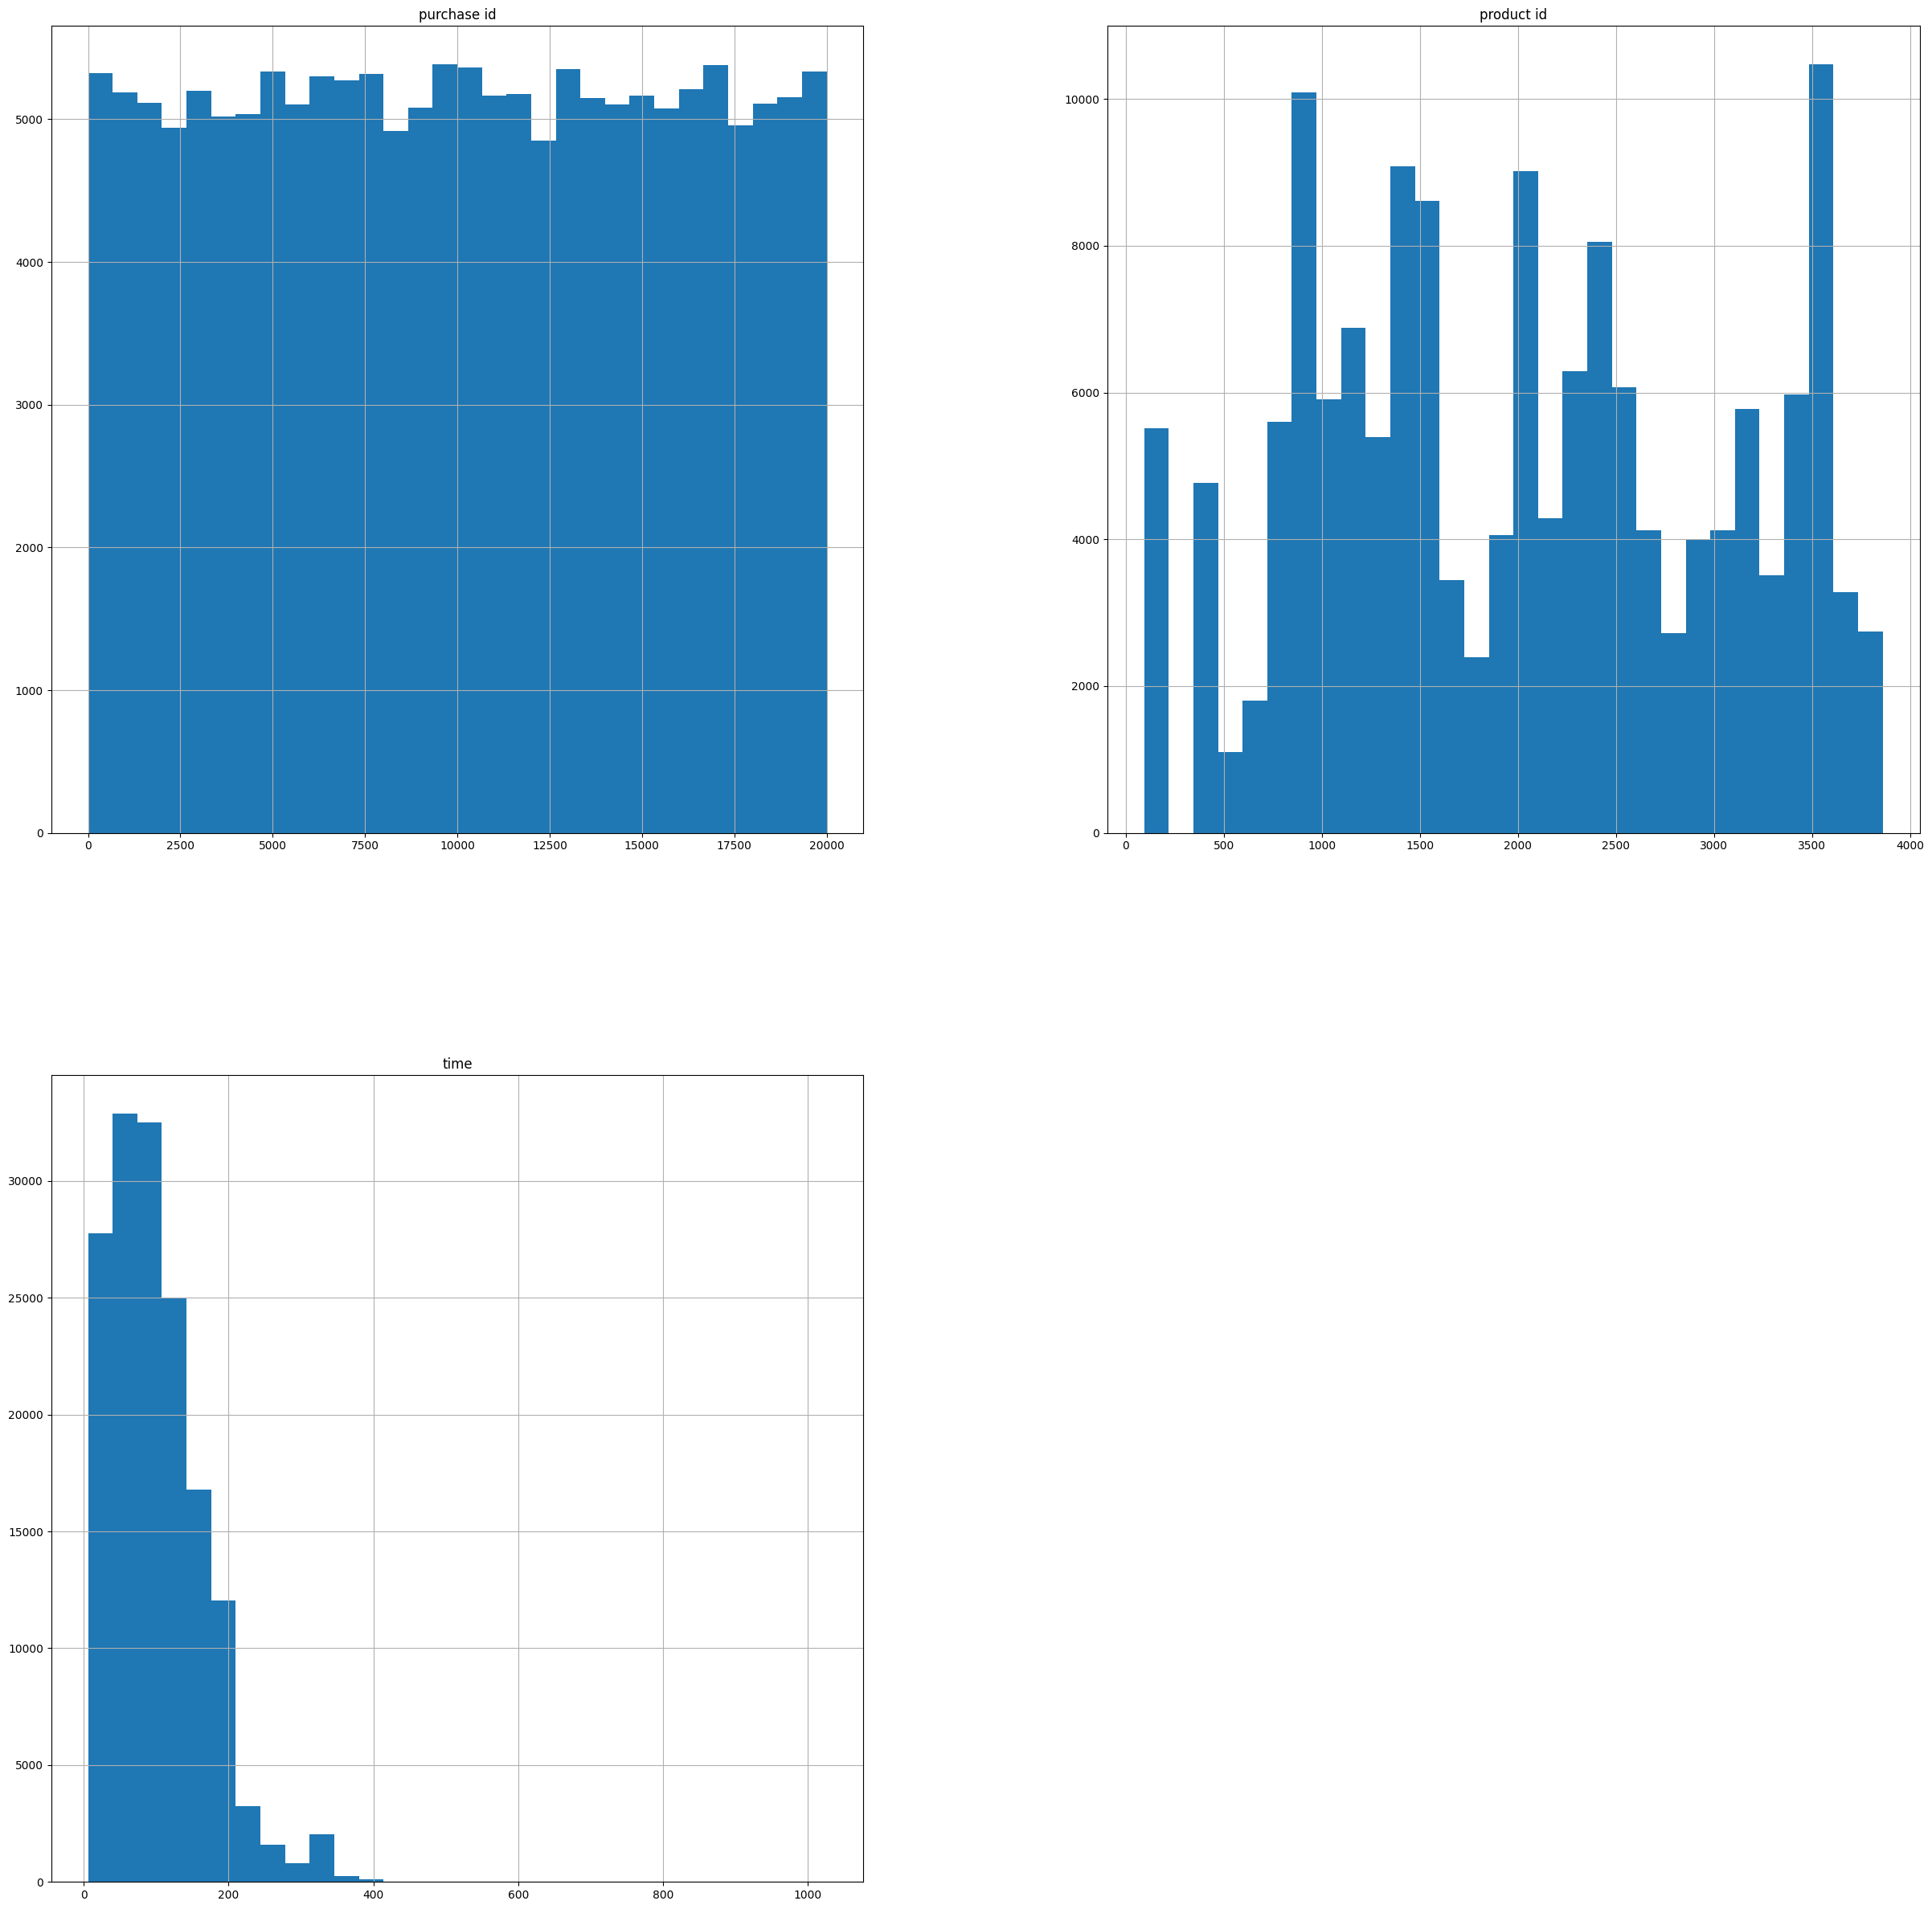

In [10]:
data_frame_purchases.hist(bins=30, figsize=(30, 30))

There are 2 categorical variables in purchases data set - product id and purchase id, so we do not really care about those distributions. For time variable there are not some big outliers, wo we will not change anything in data set for now.

In [11]:
data_frame_labels.describe()

,purchase id,amount
count,250.000000,250.000000
mean,10599.332000,0.945320
std,5659.076765,4.200001
min,129.000000,0.000000
25%,5686.250000,0.000000
50%,10818.000000,0.000000
75%,15571.000000,0.000000
max,19981.000000,43.130000


array([[<Axes: title={'center': 'purchase id'}>,
        <Axes: title={'center': 'amount'}>]], dtype=object)

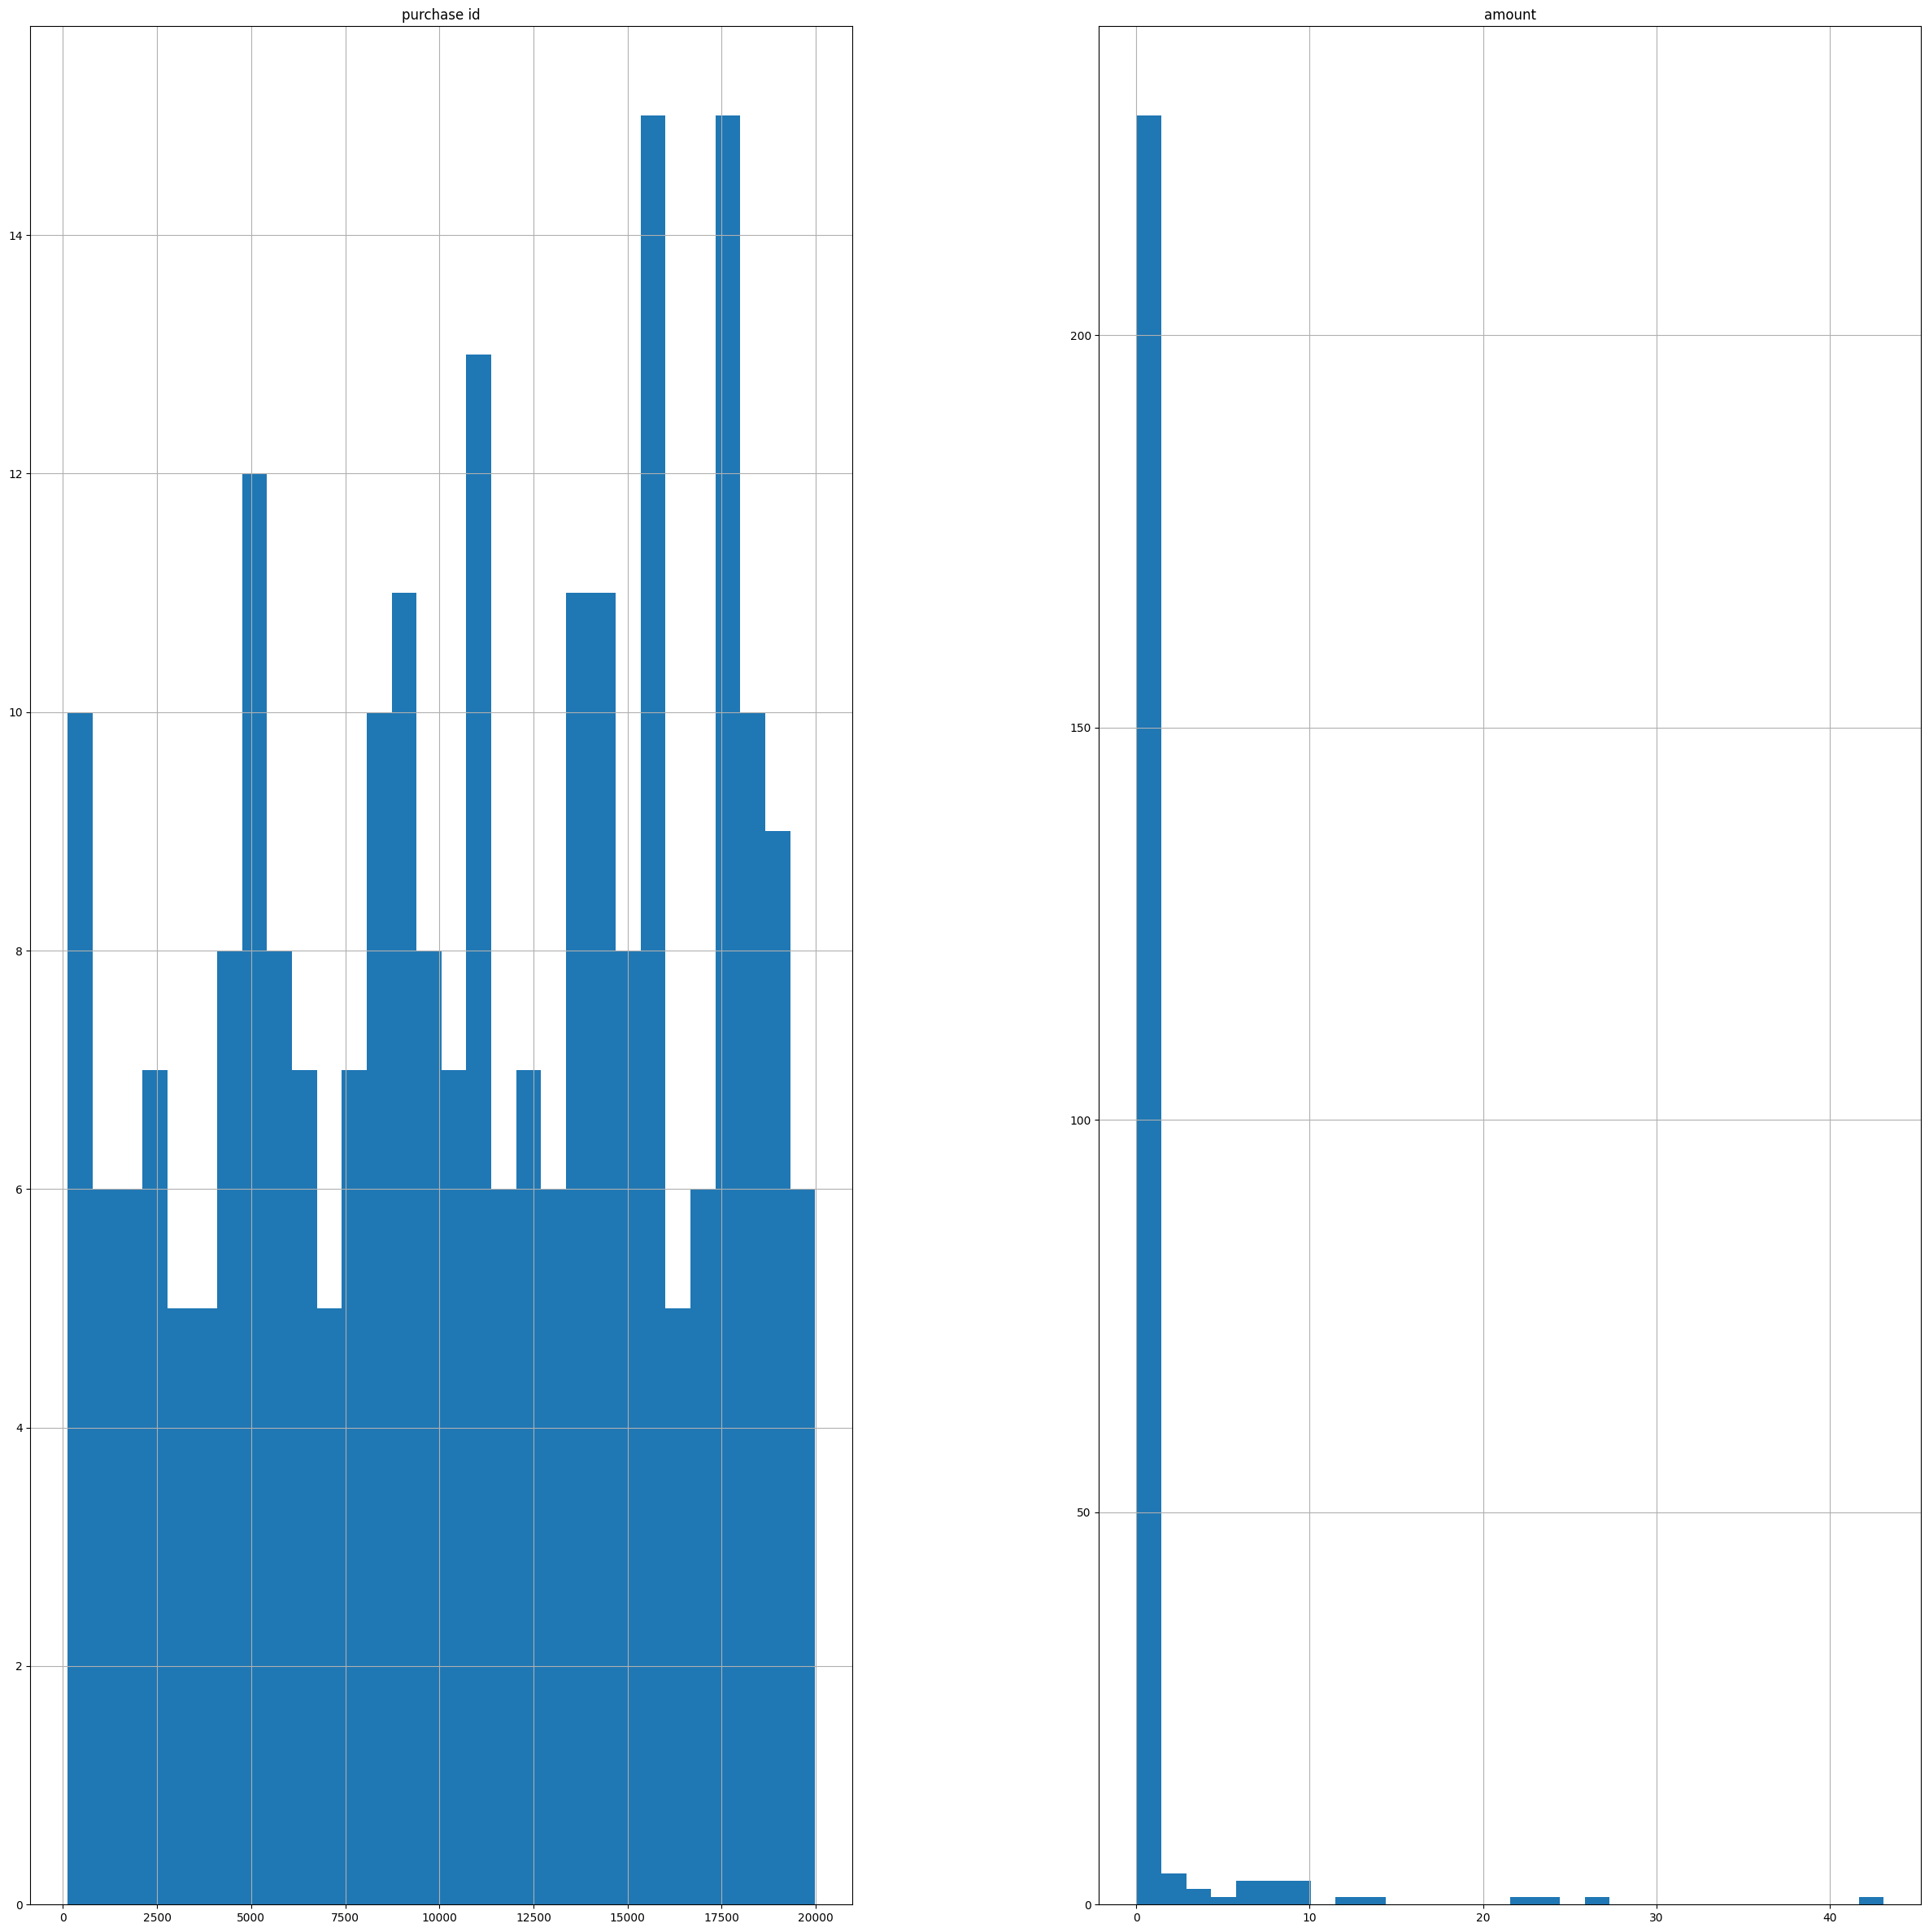

In [12]:
data_frame_labels.hist(bins=30, figsize=(30, 30))

We are not using amount variable to predict anythign so even though there is little amount of observations, which has much bigger values than others, we will elave it as it is as well.


# **3. FEATURE ENGINEERING**

Right now we will start with adding new features to our data set. The problem we are facing right now is that our orginal dataset do not have much variables, so based on what we have we will create new variables which would help us with carrying out predictions later. 

We will add time variables like - total time of transaction, avarage time per scanning a prodcut. Also price vairables - total price of transaction and avarage price of products. Than we will also add amount of products bought variable and amount of distinct categories variable. Next we want to add one variable per each category which would specify how many items of this specific distinct category was bought in transaction.

But firstly we will create variable which would specify if specific scanning of product took more time than on avarage. We basically will calculate what is avarage scanning time when someone goes from one to second category and if this time is bigger than avarage, then we would say it is abnormal. We will also try some diffrent variables with this data later, like maximum abnormality time - so if a purchase has some abnormalities we will pick it's biggest abnormality.

In [13]:
distinct_categories = data_frame_products['category'].unique()
distinct_categories = distinct_categories.tolist()
distinct_categories.append('Entry')

distinct_categories

['Baby and child',
 'Meat, chicken, fish, vega',
 'Wine and bubbles',
 'Bakery and pastry',
 'Pets',
 'Sports and dietary foods',
 'Salads, pizza, meals',
 'Cheese, cold cuts, tapas',
 'Pasta, rice and world cuisine',
 'Soups, sauces, condiments, oils',
 'Frozen foods',
 'Breakfast cereals and spreads',
 'Dairy, vegetable and eggs',
 'Sweets, biscuits, crisps and chocolate',
 'Soft drinks, juices, coffee, tea',
 'Snacks',
 'Beer and aperitifs',
 'Potatoes, vegetables, fruit',
 'Entry']

 Firstly we will prepare data frame which we will later on fill with real data.

In [14]:
times_between_categories_df = pd.DataFrame(columns=['categories'])

times_between_categories_df['categories'] = distinct_categories

for category in distinct_categories:
    times_between_categories_df[category] = 0


times_between_categories_df

,categories,Baby and child,"Meat, chicken, fish, vega",Wine and bubbles,Bakery and pastry,Pets,Sports and dietary foods,"Salads, pizza, meals","Cheese, cold cuts, tapas","Pasta, rice and world cuisine","Soups, sauces, condiments, oils",Frozen foods,Breakfast cereals and spreads,"Dairy, vegetable and eggs","Sweets, biscuits, crisps and chocolate","Soft drinks, juices, coffee, tea",Snacks,Beer and aperitifs,"Potatoes, vegetables, fruit",Entry
0,Baby and child,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Meat, chicken, fish, vega",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wine and bubbles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bakery and pastry,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Pets,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Sports and dietary foods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,"Salads, pizza, meals",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,"Cheese, cold cuts, tapas",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,"Pasta, rice and world cuisine",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,"Soups, sauces, condiments, oils",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
times_matrix = [[[0,0] for _ in range(19)] for _ in range(19)]
times_matrix

[[[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0,

In [16]:
purchase_line = data_frame_purchases.iloc[0]
product = purchase_line["product id"]
category = data_frame_products.loc[data_frame_products['id'] == product, 'category'].values[0]

index1 = distinct_categories.index('Entry')
index2 = distinct_categories.index(category)
times_matrix[index1][index2][0] += purchase_line["time"]
times_matrix[index1][index2][1] += 1


times_matrix

[[[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0,

In [17]:
for i in range(1,len(data_frame_purchases)-1):
  purchase_line1 = data_frame_purchases.iloc[i]
  product1 = purchase_line1["product id"]
  category1 = data_frame_products.loc[data_frame_products['id'] == product1, 'category'].values[0]

  purchase_line2 = data_frame_purchases.iloc[i-1]
  product2 = purchase_line2["product id"]
  category2 = data_frame_products.loc[data_frame_products['id'] == product2, 'category'].values[0]
  
  if purchase_line1['purchase id'] == purchase_line2['purchase id']:
    index1 = distinct_categories.index(category1)
    index2 = distinct_categories.index(category2)

    times_matrix[index2][index1][0] += purchase_line1["time"]
    times_matrix[index2][index1][1] += 1

  else:
    index1 = distinct_categories.index('Entry')
    index2 = distinct_categories.index(category1)
    times_matrix[index1][index2][0] += purchase_line1["time"]
    times_matrix[index1][index2][1] += 1

In [18]:
for i in range(0,len(times_matrix)):
  for j in range(0,len(times_matrix)):
    if times_matrix[i][j][1] == 0:
      times_between_categories_df.iloc[i,j+1] = 0
    else:
      times_between_categories_df.iloc[i,j+1] = times_matrix[i][j][0]/times_matrix[i][j][1]

In [19]:
times_between_categories_df

,categories,Baby and child,"Meat, chicken, fish, vega",Wine and bubbles,Bakery and pastry,Pets,Sports and dietary foods,"Salads, pizza, meals","Cheese, cold cuts, tapas","Pasta, rice and world cuisine","Soups, sauces, condiments, oils",Frozen foods,Breakfast cereals and spreads,"Dairy, vegetable and eggs","Sweets, biscuits, crisps and chocolate","Soft drinks, juices, coffee, tea",Snacks,Beer and aperitifs,"Potatoes, vegetables, fruit",Entry
0,Baby and child,22.377593,68.589286,123.805263,108.887145,42.138211,90.267442,46.674194,145.184466,115.176471,131.743421,145.804124,83.801653,163.632911,153.846715,170.697479,142.690000,115.120301,84.559441,0
1,"Meat, chicken, fish, vega",70.593952,19.724138,52.272000,37.877285,32.208333,79.838403,62.870662,72.121302,67.955017,91.216667,72.047710,92.437309,94.126923,78.368627,105.188000,64.755255,50.842105,42.740876,0
2,Wine and bubbles,124.211823,50.974202,25.976109,86.244526,80.744792,130.882662,109.157143,103.427313,121.809365,140.658363,117.846698,146.678700,50.847826,126.487654,113.047076,87.560976,42.950000,87.628253,0
3,Bakery and pastry,107.389831,36.546584,87.894495,21.864111,66.354037,115.952224,98.844358,40.493776,107.488938,129.884932,71.450142,128.105691,105.359788,122.929648,64.439331,100.438649,85.065491,79.059925,0
4,Pets,39.468839,28.472803,83.735135,68.086957,21.546392,82.317669,35.083333,101.304721,86.420290,106.131313,105.582090,70.525822,128.963190,112.042553,130.539568,98.682353,78.085526,57.859873,0
5,Sports and dietary foods,92.567944,77.884615,134.029915,116.259901,75.774011,23.982721,45.300501,146.232604,69.309322,90.349810,141.922078,79.569307,181.396714,166.968085,176.478049,143.801170,131.160000,39.401639,0
6,"Salads, pizza, meals",46.645276,61.907042,111.487805,94.889012,35.494624,44.146110,20.525641,130.591065,63.196429,81.174545,132.091160,36.329268,156.457589,144.229263,166.380282,122.684507,110.240283,81.975709,0
7,"Cheese, cold cuts, tapas",144.474138,66.620968,108.743478,37.166052,95.000000,148.409190,129.562500,31.852332,139.123311,164.010638,96.194444,155.243902,73.973333,147.538462,68.696391,114.589083,128.617737,108.865385,0
8,"Pasta, rice and world cuisine",116.377358,72.004049,119.066052,106.583942,85.800000,67.511278,62.656915,144.304147,32.253456,85.852041,144.641434,86.322148,169.761928,153.766154,182.938776,140.225806,127.715789,31.434555,0
9,"Soups, sauces, condiments, oils",135.005587,96.216000,149.538071,132.665289,100.144231,92.299663,80.486860,167.851595,79.792929,36.740260,162.486957,54.042042,192.459283,177.514925,195.957576,158.920354,150.522222,50.535714,0


Now when we acquired this data, we would create flag variable for every scan specifying if this scan took more than on avarage time. If yes than this variable will be 1 and if no than it will take value 0.

In [20]:
data_frame_purchases['scanning_abnormality'] = 0

data_frame_purchases

,purchase id,product id,time,scanning_abnormality
0,0,1445,101,0
1,0,792,132,0
2,0,1312,157,0
3,0,3257,80,0
4,0,935,88,0
...,...,...,...,...
155082,19997,2416,72,0
155083,19998,796,45,0
155084,19998,1446,49,0
155085,19999,1369,133,0


In [21]:
purchase_line = data_frame_purchases.iloc[0]
product = purchase_line["product id"]
category = data_frame_products.loc[data_frame_products['id'] == product, 'category'].values[0]

index1 = times_between_categories_df[times_between_categories_df['categories'] == 'Entry'].index[0]
index2 = times_between_categories_df.columns.get_loc(category)

if purchase_line['time'] <= times_between_categories_df.iloc[index1,index2]:
  data_frame_purchases.loc[0]['scanning_abnormality'] = 0
else:
  data_frame_purchases.loc[0]['scanning_abnormality'] = 1


for i in range(1,len(data_frame_purchases)-1):
  purchase_line1 = data_frame_purchases.iloc[i]
  product1 = purchase_line1["product id"]
  category1 = data_frame_products.loc[data_frame_products['id'] == product1, 'category'].values[0]

  purchase_line2 = data_frame_purchases.iloc[i-1]
  product2 = purchase_line2["product id"]
  category2 = data_frame_products.loc[data_frame_products['id'] == product2, 'category'].values[0]
  
  if purchase_line1['purchase id'] == purchase_line2['purchase id']:
    index1 = times_between_categories_df[times_between_categories_df['categories'] == category1].index[0]
    index2 = times_between_categories_df.columns.get_loc(category2)

    if category1==category2: 
      data_frame_purchases.loc[i]['scanning_abnormality'] = 0

    else:
      if purchase_line1['time'] <= times_between_categories_df.iloc[index1,index2]:
        data_frame_purchases.loc[i]['scanning_abnormality'] = 0
      else:
        data_frame_purchases.loc[i]['scanning_abnormality'] = 1 
  else:
    index1 = times_between_categories_df[times_between_categories_df['categories'] == 'Entry'].index[0]
    index2 = times_between_categories_df.columns.get_loc(category1)

    if purchase_line1['time'] <= times_between_categories_df.iloc[index1,index2]:
      data_frame_purchases.loc[i]['scanning_abnormality'] = 0
    else:
      data_frame_purchases.loc[i]['scanning_abnormality'] = 1
    

In [22]:
data_frame_purchases

,purchase id,product id,time,scanning_abnormality
0,0,1445,101,1
1,0,792,132,1
2,0,1312,157,1
3,0,3257,80,1
4,0,935,88,1
...,...,...,...,...
155082,19997,2416,72,0
155083,19998,796,45,0
155084,19998,1446,49,0
155085,19999,1369,133,1


In [23]:
data_frame_purchases['scanning_abnormality'].value_counts()

1    83488
0    71599
Name: scanning_abnormality, dtype: int64

Having this variable we will create maximum abnormality variable, which will specify maximum abnormality time.

In [24]:
abnormal_purchases = data_frame_purchases[data_frame_purchases['scanning_abnormality'] == 1]

grouped = abnormal_purchases.groupby('purchase id')

max_time_per_purchase = grouped['time'].max()

max_time_per_purchase = max_time_per_purchase.reset_index()

result = data_frame_purchases.merge(max_time_per_purchase, on='purchase id', how='left')
result['time_y'] = result['time_y'].fillna(0)
result = result.rename(columns={'time_x': 'time'})
result

,purchase id,product id,time,scanning_abnormality,time_y
0,0,1445,101,1,160.0
1,0,792,132,1,160.0
2,0,1312,157,1,160.0
3,0,3257,80,1,160.0
4,0,935,88,1,160.0
...,...,...,...,...,...
155082,19997,2416,72,0,0.0
155083,19998,796,45,0,0.0
155084,19998,1446,49,0,0.0
155085,19999,1369,133,1,133.0


Right now let's create other variables we mentioned before.

In [25]:
purchase_with_products_info= pd.merge(result, data_frame_products,  how='left', left_on='product id', right_on='id') 
purchase_with_products_info = purchase_with_products_info.drop('id', axis=1)

categories_count_df = purchase_with_products_info.groupby("purchase id")["category"].nunique().reset_index().rename(columns={'category': 'amount_of_categories'})
purchase_with_products_info = pd.merge(purchase_with_products_info, categories_count_df, on='purchase id') 
purchase_with_products_info = pd.get_dummies(purchase_with_products_info, columns=['category'], prefix='category')

purchase_with_products_info

,purchase id,product id,time,scanning_abnormality,time_y,sub category,product,price,unit,weight,...,"category_Pasta, rice and world cuisine",category_Pets,"category_Potatoes, vegetables, fruit","category_Salads, pizza, meals",category_Snacks,"category_Soft drinks, juices, coffee, tea","category_Soups, sauces, condiments, oils",category_Sports and dietary foods,"category_Sweets, biscuits, crisps and chocolate",category_Wine and bubbles
0,0,1445,101,1,160.0,Beer,Brand Pilsener krat,15.49,"24 x 0,3 lNormale prijs per LT € 2,87",30 Centiliter,...,0,0,0,0,0,0,0,0,0,0
1,0,792,132,1,160.0,Frozen snacks,AH Oven kroket,2.49,"320 gPrijs per KG € 7,78",320 Gram,...,0,0,0,0,0,0,0,0,0,0
2,0,1312,157,1,160.0,"Pasta, rice, noodles",Grand' Italia Penne tradizionali,2.90,"500 gPrijs per KG € 4,18",500 Gram,...,1,0,0,0,0,0,0,0,0,0
3,0,3257,80,1,160.0,Fish,Olav's Gerookte zalmfilet,5.99,"200 gPrijs per KG € 29,95",200 Gram,...,0,0,0,0,0,0,0,0,0,0
4,0,935,88,1,160.0,Protein bars,Barebells Protein bar hazelnut & nougat,2.65,"55 gPrijs per KG € 48,18",55 Gram,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155082,19997,2416,72,0,0.0,Breakfast cereals,Quaker Cruesli rood fruit,4.90,"450 gNormale prijs per KG € 9,09",450 Gram,...,0,0,0,0,0,0,0,0,0,0
155083,19998,796,45,0,0.0,Frozen snacks,Dr. Oetker Ristorante piccolissima prosciutto,3.69,"216 gPrijs per KG € 17,08",9 Stuks (piece). 216 Gram,...,0,0,0,0,0,0,0,0,0,0
155084,19998,1446,49,0,0.0,Beer,Lander bräu Premium beer 6-pack,4.90,"6 x 50 clPrijs per LT € 1,36",0.5 Liter,...,0,0,0,0,0,0,0,0,0,0
155085,19999,1369,133,1,133.0,Alcohol-free beer and beer low in alcohol,Corona Cero 0.0 alcoholvrij bier 6-pack,8.25,"6 x 33 clPrijs per LT € 4,17",0.33 Liter,...,0,0,0,0,0,0,0,0,0,0


In [26]:
transaction_summary = purchase_with_products_info.groupby('purchase id').agg(
    total_price=pd.NamedAgg(column='price', aggfunc='sum'),
    avg_price=pd.NamedAgg(column='price', aggfunc='mean'),
    min_price=pd.NamedAgg(column='price', aggfunc='min'),
    max_price=pd.NamedAgg(column='price', aggfunc='max'),
    median_price=pd.NamedAgg(column='price', aggfunc='median'),
    total_time=pd.NamedAgg(column='time', aggfunc='sum'),
    avarage_time=pd.NamedAgg(column='time', aggfunc='mean'),
    min_time=pd.NamedAgg(column='time', aggfunc='min'),
    max_time=pd.NamedAgg(column='time', aggfunc='max'),
    median_time=pd.NamedAgg(column='time', aggfunc='median'),
    time_abnormality = pd.NamedAgg(column='scanning_abnormality',aggfunc='mean'),
    time_abnormality_median = pd.NamedAgg(column='scanning_abnormality',aggfunc='median'),
    max_time_abnormality = pd.NamedAgg(column='time_y', aggfunc='max'),
    amount_of_products=pd.NamedAgg(column='purchase id', aggfunc='count'), 
    amount_of_categories=pd.NamedAgg(column='amount_of_categories', aggfunc='mean'),
    **{f'category_{i}': pd.NamedAgg(column=f'category_{i}', aggfunc='sum') for i in data_frame_products['category'].unique()}
).reset_index()

mean_value = data_frame_purchases['time'].mean()
percentile_75 = data_frame_purchases['time'].quantile(0.75)

transaction_summary['more_than_avg'] = transaction_summary['avarage_time'].apply(
    lambda x: 1 if x > mean_value else 0)

transaction_summary['more_than_75'] = transaction_summary['avarage_time'].apply(
    lambda x: 1 if x > percentile_75 else 0)

transaction_summary

,purchase id,total_price,avg_price,min_price,max_price,median_price,total_time,avarage_time,min_time,max_time,...,category_Frozen foods,category_Breakfast cereals and spreads,"category_Dairy, vegetable and eggs","category_Sweets, biscuits, crisps and chocolate","category_Soft drinks, juices, coffee, tea",category_Snacks,category_Beer and aperitifs,"category_Potatoes, vegetables, fruit",more_than_avg,more_than_75
0,0,35.39,4.423750,1.39,15.49,2.570,927,115.875000,74,160,...,1,0,0,0,0,0,2,0,1,0
1,1,52.07,5.785556,1.25,24.99,2.990,154,17.111111,6,41,...,0,1,1,0,0,0,0,1,0,0
2,2,65.62,4.101250,1.39,19.99,2.725,2028,126.750000,66,196,...,0,2,0,2,0,1,1,1,1,0
3,3,8.86,2.215000,0.89,2.99,2.490,243,60.750000,16,81,...,1,0,0,0,0,2,0,0,0,0
4,4,7.38,3.690000,2.39,4.99,3.690,79,39.500000,36,43,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,41.65,3.203846,0.99,7.49,2.390,1478,113.692308,53,214,...,0,1,0,0,0,1,1,1,1,0
19996,19996,12.07,3.017500,1.99,3.90,3.090,175,43.750000,33,74,...,0,2,0,0,0,0,0,0,0,0
19997,19997,19.05,2.116667,0.89,4.90,1.900,750,83.333333,31,146,...,0,2,0,0,2,0,0,1,0,0
19998,19998,8.59,4.295000,3.69,4.90,4.295,94,47.000000,45,49,...,1,0,0,0,0,0,1,0,0,0


#**4. DATA ANALYSIS**

Now when we have this data for all purchases, we will merge it with labels data set, which will be used to create our predictive model.

In [27]:
data_frame_labels['Fraud'] = data_frame_labels['amount'].apply(lambda x: 1 if x > 0 else 0)
labels_summary = pd.merge(data_frame_labels, transaction_summary, on='purchase id', how='left')
labels_summary

,purchase id,amount,Fraud,total_price,avg_price,min_price,max_price,median_price,total_time,avarage_time,...,category_Frozen foods,category_Breakfast cereals and spreads,"category_Dairy, vegetable and eggs","category_Sweets, biscuits, crisps and chocolate","category_Soft drinks, juices, coffee, tea",category_Snacks,category_Beer and aperitifs,"category_Potatoes, vegetables, fruit",more_than_avg,more_than_75
0,129,0.0,0,22.22,5.555000,2.29,9.49,5.220,126,31.500000,...,0,0,1,0,0,0,0,1,0,0
1,192,0.0,0,33.11,3.678889,0.99,6.99,2.990,1446,160.666667,...,0,1,0,0,0,1,0,0,1,1
2,195,0.0,0,4.48,2.240000,1.99,2.49,2.240,358,179.000000,...,1,0,0,0,0,1,0,0,1,1
3,203,0.0,0,18.25,3.650000,1.59,7.49,3.190,66,13.200000,...,0,2,0,0,0,0,0,0,0,0
4,547,0.0,0,8.08,2.693333,1.29,3.79,3.000,285,95.000000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,19381,0.0,0,33.41,6.682000,2.75,16.99,3.990,63,12.600000,...,0,2,0,0,0,0,0,0,0,0
246,19584,0.0,0,34.19,2.849167,0.77,10.43,1.990,1413,117.750000,...,2,0,1,1,0,1,1,0,1,0
247,19700,0.0,0,45.69,5.076667,0.89,21.37,2.790,1008,112.000000,...,2,0,1,1,0,0,2,0,1,0
248,19744,0.0,0,51.40,3.426667,1.29,7.49,2.900,2082,138.800000,...,1,2,1,2,1,0,1,1,1,1


In [28]:
labels_summary['Fraud'].value_counts()

0    226
1     24
Name: Fraud, dtype: int64

array([[<Axes: title={'center': 'purchase id'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'Fraud'}>,
        <Axes: title={'center': 'total_price'}>,
        <Axes: title={'center': 'avg_price'}>,
        <Axes: title={'center': 'min_price'}>],
       [<Axes: title={'center': 'max_price'}>,
        <Axes: title={'center': 'median_price'}>,
        <Axes: title={'center': 'total_time'}>,
        <Axes: title={'center': 'avarage_time'}>,
        <Axes: title={'center': 'min_time'}>,
        <Axes: title={'center': 'max_time'}>],
       [<Axes: title={'center': 'median_time'}>,
        <Axes: title={'center': 'time_abnormality'}>,
        <Axes: title={'center': 'time_abnormality_median'}>,
        <Axes: title={'center': 'max_time_abnormality'}>,
        <Axes: title={'center': 'amount_of_products'}>,
        <Axes: title={'center': 'amount_of_categories'}>],
       [<Axes: title={'center': 'category_Baby and child'}>,
        <Axes: title={'center': 'c

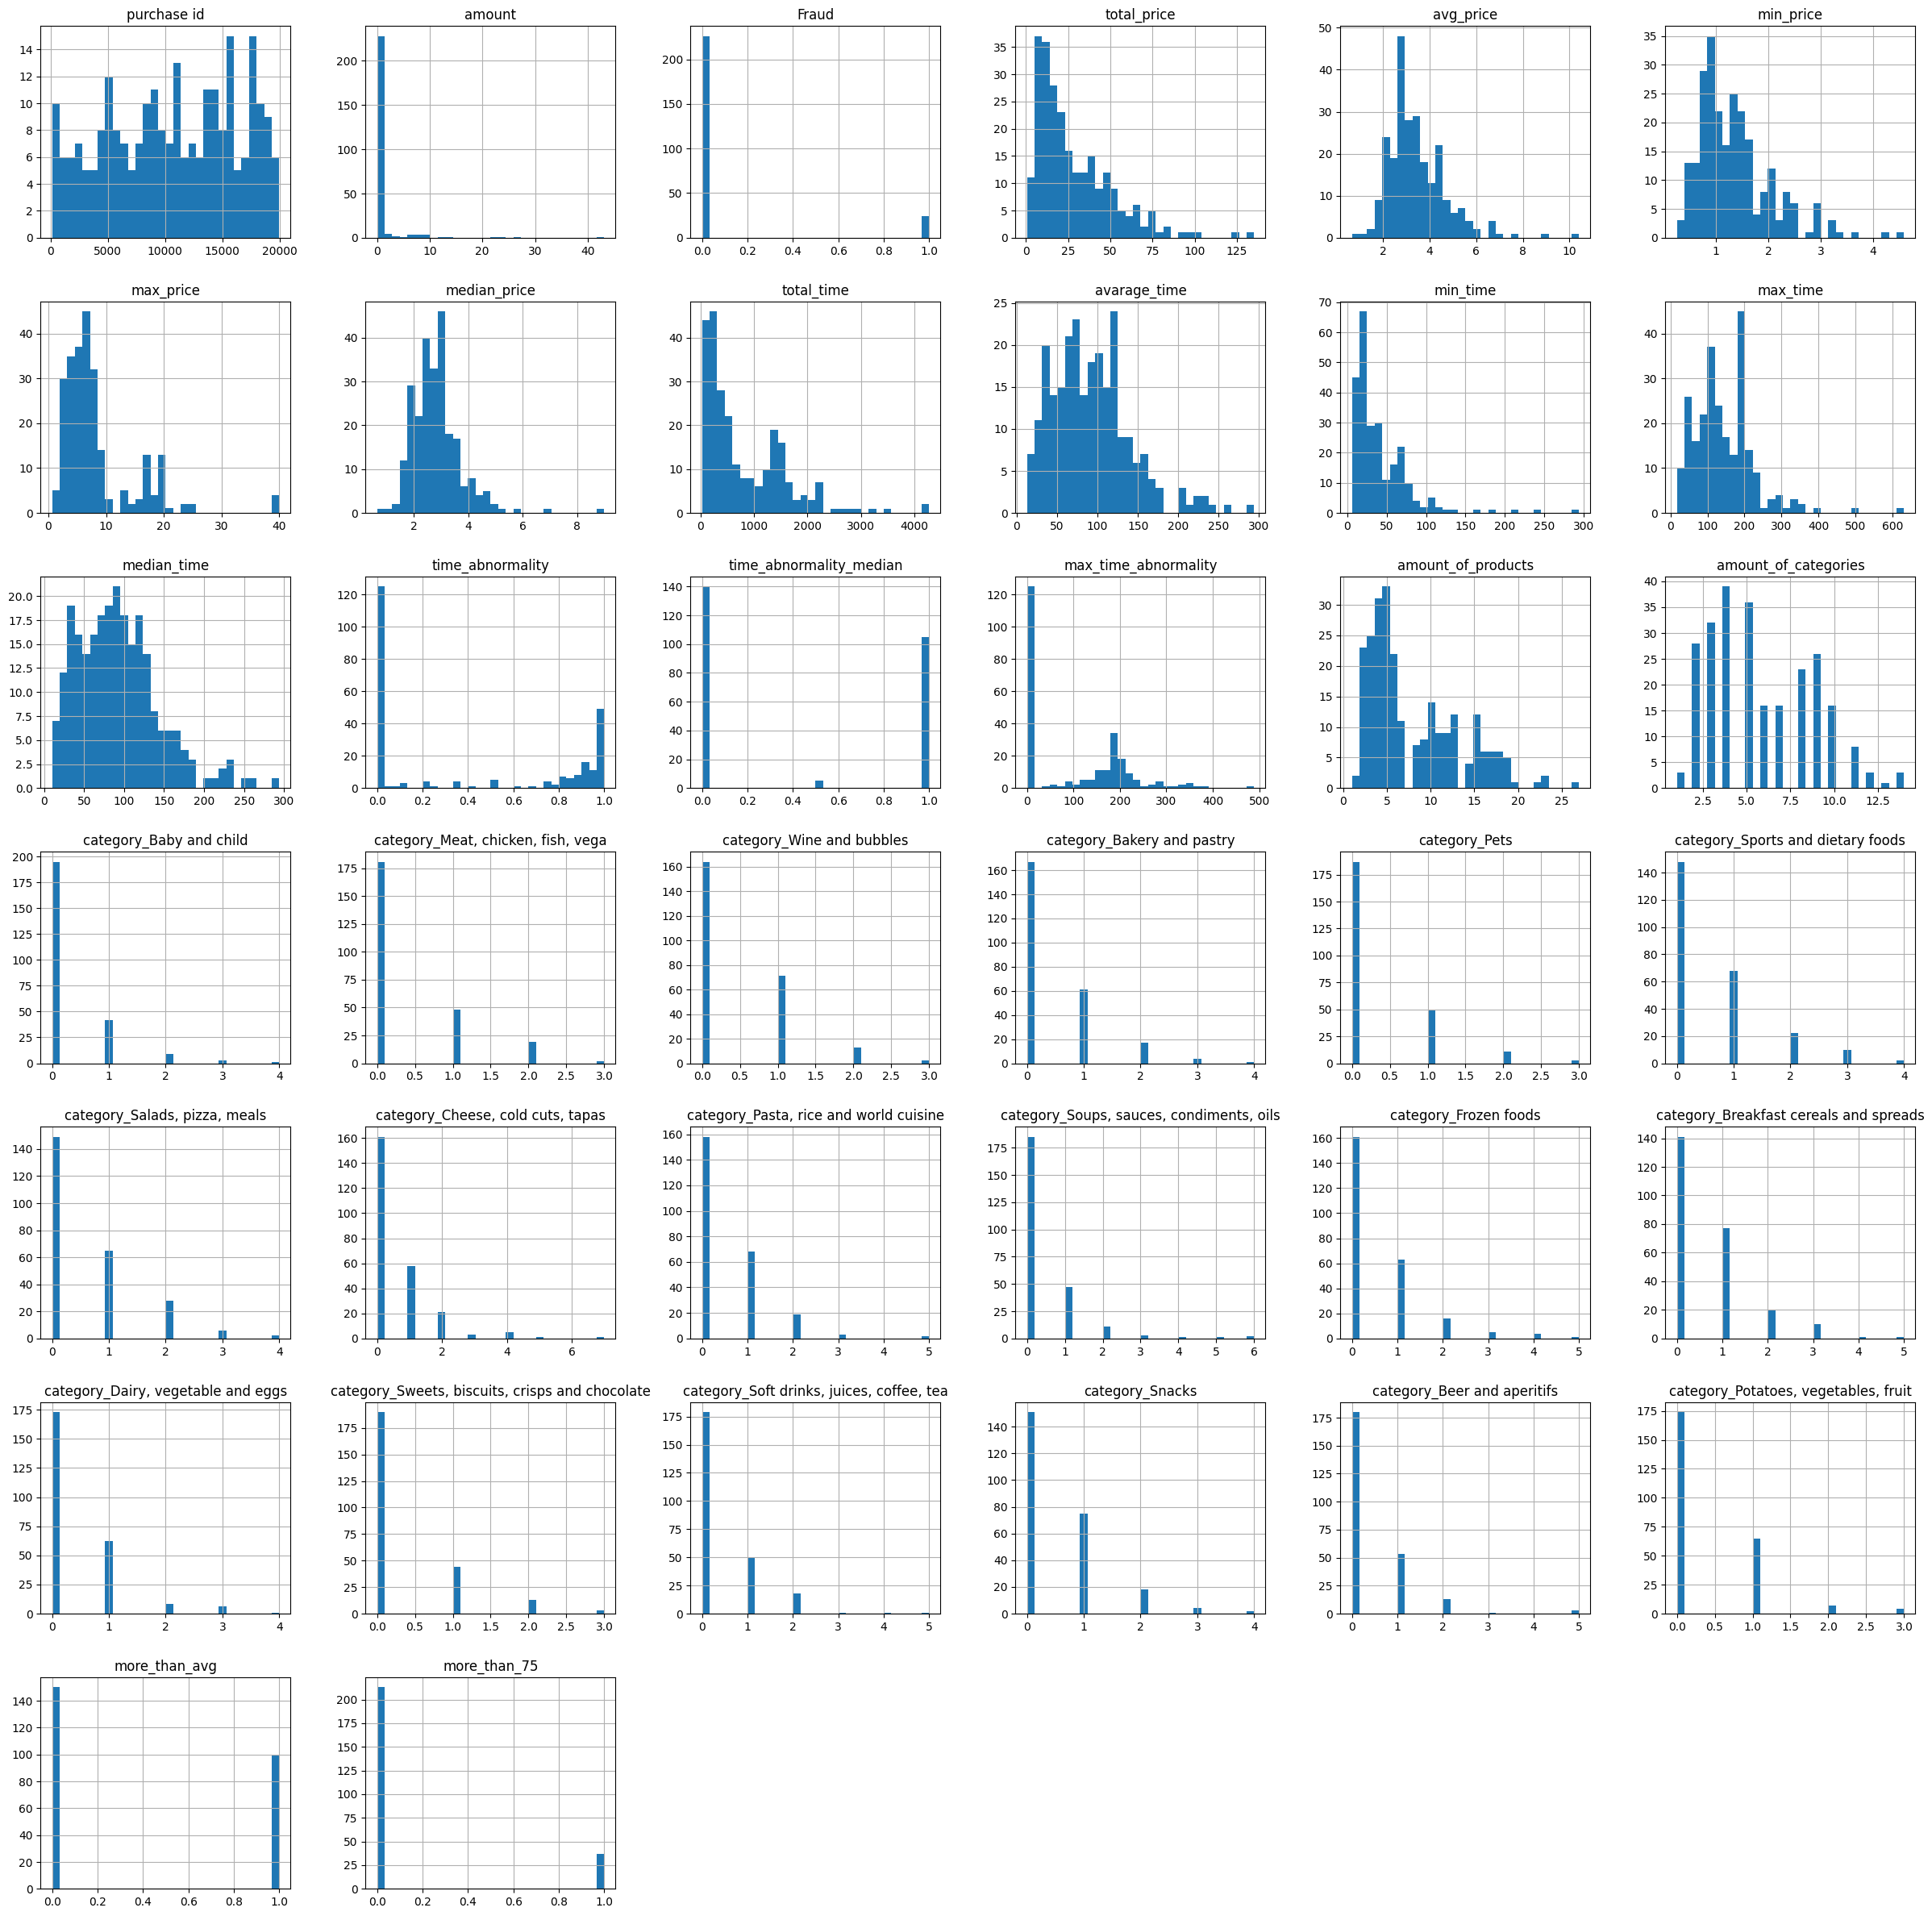

In [29]:
labels_summary.hist(bins=30, figsize=(30, 30))

In [30]:
labels_summary.describe()

,purchase id,amount,Fraud,total_price,avg_price,min_price,max_price,median_price,total_time,avarage_time,...,category_Frozen foods,category_Breakfast cereals and spreads,"category_Dairy, vegetable and eggs","category_Sweets, biscuits, crisps and chocolate","category_Soft drinks, juices, coffee, tea",category_Snacks,category_Beer and aperitifs,"category_Potatoes, vegetables, fruit",more_than_avg,more_than_75
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,10599.332000,0.945320,0.096000,28.452800,3.434028,1.336240,8.416640,2.825480,806.368000,92.320699,...,0.524000,0.624000,0.400000,0.31600,0.392000,0.524000,0.388000,0.364000,0.400000,0.148000
std,5659.076765,4.200001,0.295182,22.636961,1.269448,0.715057,6.706193,0.906185,756.586442,49.211998,...,0.878928,0.875035,0.705685,0.62747,0.732449,0.766665,0.779671,0.620519,0.490881,0.355812
min,129.000000,0.000000,0.000000,0.650000,0.650000,0.250000,0.650000,0.650000,29.000000,12.600000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5686.250000,0.000000,0.000000,12.017500,2.633824,0.850000,4.290000,2.290000,237.000000,56.741667,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10818.000000,0.000000,0.000000,21.225000,3.163929,1.190000,5.990000,2.695000,479.000000,87.785714,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15571.000000,0.000000,0.000000,40.725000,4.162115,1.590000,8.820000,3.190000,1326.250000,118.863636,...,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,19981.000000,43.130000,1.000000,135.170000,10.423333,4.590000,39.990000,8.990000,4275.000000,294.000000,...,5.000000,5.000000,4.000000,3.00000,5.000000,4.000000,5.000000,3.000000,1.000000,1.000000


Let's take a look on corrlation between variables right now. We will later delete the variables which has small correlation with fraud in order to increase predictablity of our more correalted variables. We decided on a threshold of 5%. Also we will normalize our data in order to put variables on a same scale for our predictions. We decided on min/max normalziation as our variables are all countinous.

In [31]:
labels_normalized = labels_summary.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

labels_normalized

,purchase id,amount,Fraud,total_price,avg_price,min_price,max_price,median_price,total_time,avarage_time,...,category_Frozen foods,category_Breakfast cereals and spreads,"category_Dairy, vegetable and eggs","category_Sweets, biscuits, crisps and chocolate","category_Soft drinks, juices, coffee, tea",category_Snacks,category_Beer and aperitifs,"category_Potatoes, vegetables, fruit",more_than_avg,more_than_75
0,0.000000,0.0,0.0,0.160348,0.501876,0.470046,0.224708,0.547962,0.022845,0.067164,...,0.0,0.0,0.25,0.000000,0.0,0.00,0.0,0.333333,0.0,0.0
1,0.003173,0.0,0.0,0.241302,0.309914,0.170507,0.161159,0.280576,0.333726,0.526179,...,0.0,0.2,0.00,0.000000,0.0,0.25,0.0,0.000000,1.0,1.0
2,0.003325,0.0,0.0,0.028472,0.162688,0.400922,0.046772,0.190647,0.077485,0.591329,...,0.2,0.0,0.00,0.000000,0.0,0.25,0.0,0.000000,1.0,1.0
3,0.003728,0.0,0.0,0.130836,0.306958,0.308756,0.173869,0.304556,0.008714,0.002132,...,0.0,0.4,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0
4,0.021056,0.0,0.0,0.055233,0.209072,0.239631,0.079817,0.281775,0.060292,0.292822,...,0.0,0.2,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.969776,0.0,0.0,0.243533,0.617190,0.576037,0.415353,0.400480,0.008008,0.000000,...,0.0,0.4,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0
246,0.980002,0.0,0.0,0.249331,0.225017,0.119816,0.248602,0.160671,0.325954,0.373667,...,0.4,0.0,0.25,0.333333,0.0,0.25,0.2,0.000000,1.0,0.0
247,0.985845,0.0,0.0,0.334820,0.452933,0.147465,0.526690,0.256595,0.230570,0.353234,...,0.4,0.0,0.25,0.333333,0.0,0.00,0.4,0.000000,1.0,0.0
248,0.988062,0.0,0.0,0.377267,0.284106,0.239631,0.173869,0.269784,0.483514,0.448472,...,0.2,0.4,0.25,0.666667,0.2,0.00,0.2,0.333333,1.0,1.0


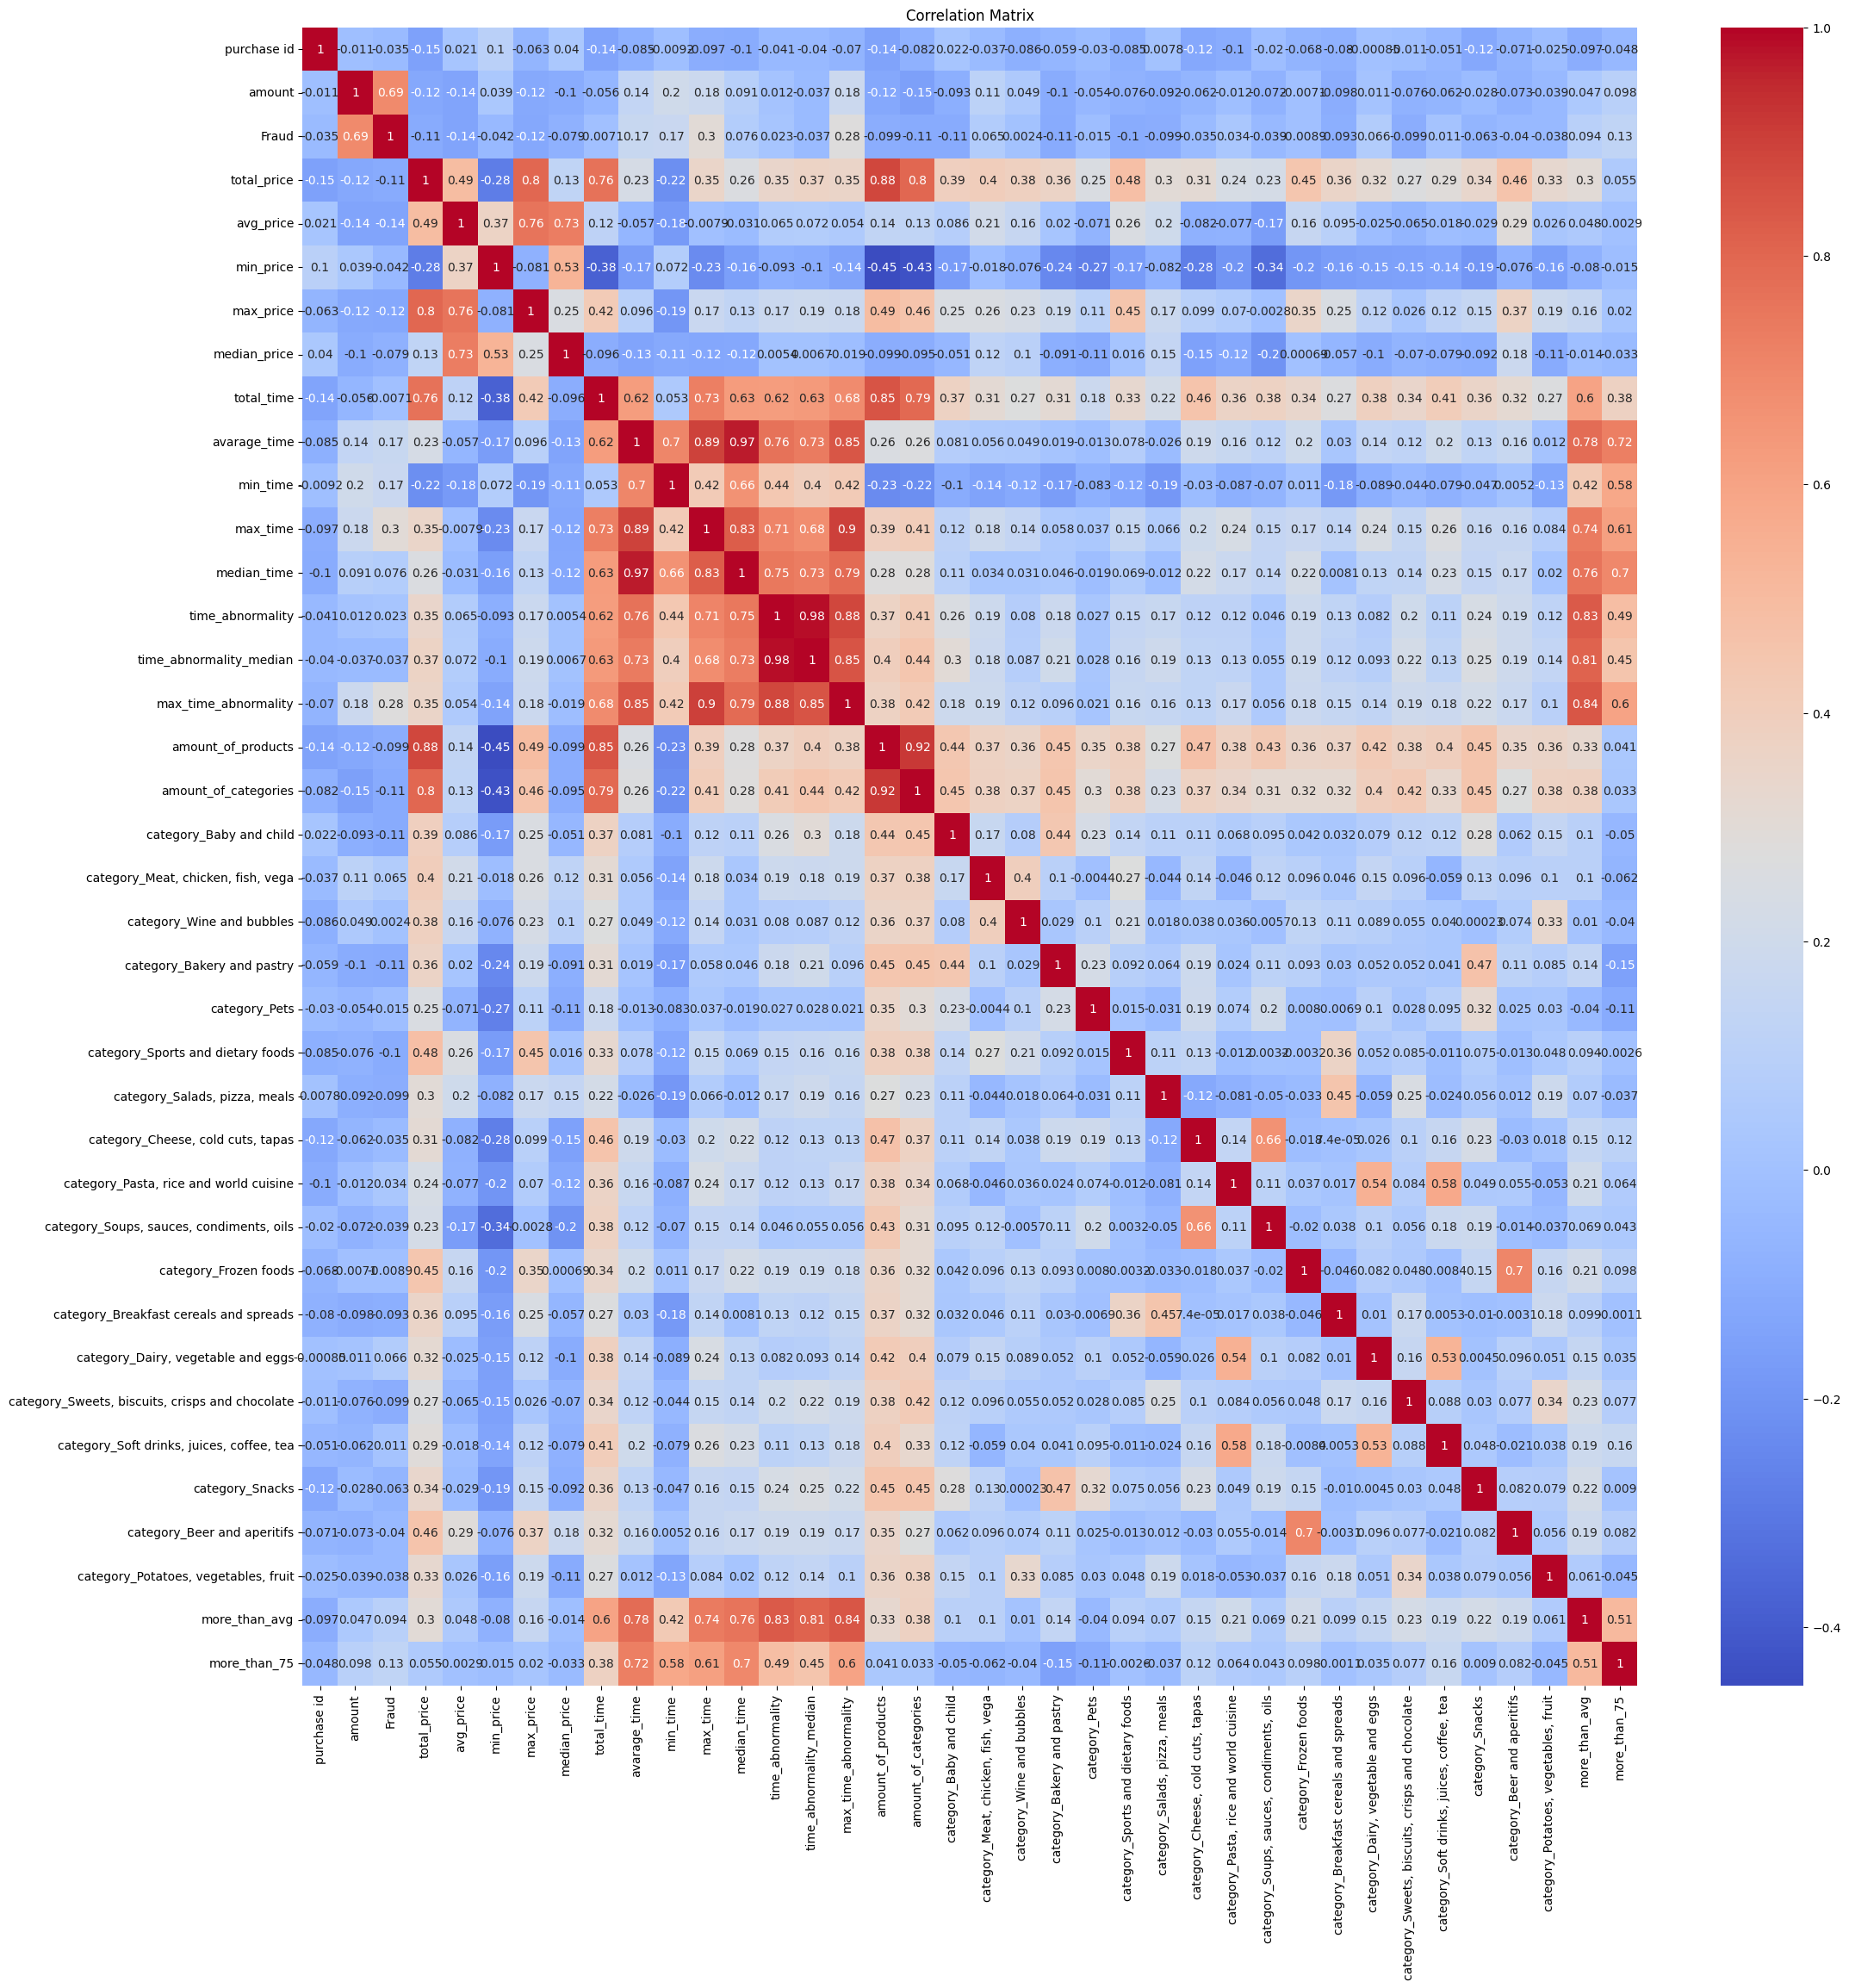

In [32]:
correlation_matrix = labels_normalized.corr()

# Plotting the correlation matrix using heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **5. MODELS CREATION AND VALIDATION**

As specified above we are starting with getting rid off low correalted variables. Then we will procide with schuffeling a data before it's partion on training and testing sets. We decided to divide our data set into 75% of observation in Training set and 25% of observation in Testing set.

In [33]:
correlation = labels_normalized.corr().Fraud
correlation

dropped1 = [i for i in correlation.index if correlation[i] > -0.05 and correlation[i] < 0.05]
dropped1

['purchase id',
 'min_price',
 'total_time',
 'time_abnormality',
 'time_abnormality_median',
 'category_Wine and bubbles',
 'category_Pets',
 'category_Cheese, cold cuts, tapas',
 'category_Pasta, rice and world cuisine',
 'category_Soups, sauces, condiments, oils',
 'category_Frozen foods',
 'category_Soft drinks, juices, coffee, tea',
 'category_Beer and aperitifs',
 'category_Potatoes, vegetables, fruit']

In [34]:
labels_schuffel = labels_normalized.sample(frac=1, random_state=1)
labels_schuffel

,purchase id,amount,Fraud,total_price,avg_price,min_price,max_price,median_price,total_time,avarage_time,...,category_Frozen foods,category_Breakfast cereals and spreads,"category_Dairy, vegetable and eggs","category_Sweets, biscuits, crisps and chocolate","category_Soft drinks, juices, coffee, tea",category_Snacks,category_Beer and aperitifs,"category_Potatoes, vegetables, fruit",more_than_avg,more_than_75
67,0.304100,0.000000,0.0,0.355486,0.225223,0.147465,0.192171,0.244604,0.462553,0.371838,...,0.4,0.0,0.25,1.000000,0.2,0.00,0.2,0.666667,1.0,0.0
249,1.000000,0.000000,0.0,0.117157,0.213336,0.161290,0.110320,0.215228,0.053698,0.107439,...,0.0,0.0,0.50,0.000000,0.0,0.25,0.0,0.333333,0.0,0.0
230,0.925448,0.000000,0.0,0.075305,0.301160,0.380184,0.128114,0.304556,0.031324,0.147122,...,0.0,0.0,0.00,0.000000,0.0,0.25,0.0,0.000000,0.0,0.0
161,0.685875,0.000000,0.0,0.024011,0.131992,0.285714,0.044230,0.154676,0.047810,0.367448,...,0.0,0.0,0.00,0.000000,0.0,0.25,0.0,0.000000,1.0,0.0
91,0.420159,0.185022,1.0,0.038582,0.232265,0.299539,0.092527,0.272182,0.062412,0.477612,...,0.2,0.0,0.00,0.000000,0.0,0.00,0.0,0.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.582511,0.000000,0.0,0.233571,0.261630,0.124424,0.161159,0.290168,0.274376,0.379531,...,0.6,0.2,0.00,0.000000,0.0,0.25,0.0,0.000000,1.0,0.0
72,0.327221,0.000000,0.0,0.282560,0.293098,0.078341,0.148449,0.299760,0.301225,0.377786,...,0.0,0.2,0.25,0.000000,0.0,0.00,0.0,0.000000,1.0,0.0
140,0.591477,0.000000,0.0,0.291555,0.247298,0.138249,0.100407,0.340528,0.308997,0.321798,...,0.0,0.0,0.00,1.000000,0.0,0.25,0.0,0.333333,1.0,0.0
235,0.935321,0.000000,0.0,0.155367,0.248490,0.285714,0.161159,0.148681,0.041215,0.058788,...,0.0,0.0,0.00,0.333333,0.0,0.25,0.0,0.000000,0.0,0.0


In [35]:
labels_train = labels_schuffel.drop(columns=dropped1)
labels_train

,amount,Fraud,total_price,avg_price,max_price,median_price,avarage_time,min_time,max_time,median_time,...,"category_Meat, chicken, fish, vega",category_Bakery and pastry,category_Sports and dietary foods,"category_Salads, pizza, meals",category_Breakfast cereals and spreads,"category_Dairy, vegetable and eggs","category_Sweets, biscuits, crisps and chocolate",category_Snacks,more_than_avg,more_than_75
67,0.000000,0.0,0.355486,0.225223,0.192171,0.244604,0.371838,0.142361,0.284553,0.369718,...,0.333333,0.00,0.25,0.00,0.0,0.25,1.000000,0.00,1.0,0.0
249,0.000000,0.0,0.117157,0.213336,0.110320,0.215228,0.107439,0.031250,0.130081,0.086268,...,0.333333,0.00,0.00,0.00,0.0,0.50,0.000000,0.25,0.0,0.0
230,0.000000,0.0,0.075305,0.301160,0.128114,0.304556,0.147122,0.142361,0.069919,0.158451,...,0.000000,0.25,0.00,0.00,0.0,0.00,0.000000,0.25,0.0,0.0
161,0.000000,0.0,0.024011,0.131992,0.044230,0.154676,0.367448,0.354167,0.173984,0.373239,...,0.000000,0.00,0.00,0.00,0.0,0.00,0.000000,0.25,1.0,0.0
91,0.185022,1.0,0.038582,0.232265,0.092527,0.272182,0.477612,0.340278,0.281301,0.482394,...,0.000000,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.000000,0.0,0.233571,0.261630,0.161159,0.290168,0.379531,0.222222,0.274797,0.385563,...,0.333333,0.00,0.25,0.25,0.2,0.00,0.000000,0.25,1.0,0.0
72,0.000000,0.0,0.282560,0.293098,0.148449,0.299760,0.377786,0.059028,0.286179,0.341549,...,0.666667,0.00,0.25,0.00,0.2,0.25,0.000000,0.00,1.0,0.0
140,0.000000,0.0,0.291555,0.247298,0.100407,0.340528,0.321798,0.055556,0.239024,0.373239,...,0.000000,0.50,0.25,0.25,0.0,0.00,1.000000,0.25,1.0,0.0
235,0.000000,0.0,0.155367,0.248490,0.161159,0.148681,0.058788,0.006944,0.050407,0.070423,...,0.000000,0.25,0.00,0.25,0.0,0.00,0.333333,0.25,0.0,0.0


In [36]:
train, test = labels_train[:187], labels_train[187:]
train['Fraud'].value_counts(), test['Fraud'].value_counts()

(0.0    168
 1.0     19
 Name: Fraud, dtype: int64,
 0.0    58
 1.0     5
 Name: Fraud, dtype: int64)

In [37]:
train_np, test_np = train.to_numpy(), test.to_numpy()
train_np.shape, test_np.shape

((187, 24), (63, 24))

In [38]:
x_train, y_train = train_np[:,2:24], train_np[:,1]
x_test, y_test = test_np[:,2:24], test_np[:,1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((187, 22), (187,), (63, 22), (63,))

We decided to test 3 models: 

*   SVM ( Support Vector Machine ) 
*   Logistic Regression 
*   ADA Boost SVM, which applies boosting on SVM model.

We will look on precision, recall and f1-scores of this models, for both Fraud and No Fraud cases. Our goal is to get a model which would have as big recall for Fraud cases, because then we predict big amount of Fraud and with big precision for Fraud as well, because then we pick for check out mostly Fraudlent purchses. We expect models to have overall satisfactionary findings of precision and recall for no fraud cases, as they are big part of our database, so even if we miss some no fraud cases in our predicitons it will not reflect on our model performance so much.





In [39]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
print(classification_report(y_test, svc.predict(x_test), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.96      0.84      0.90        58
       Fraud       0.25      0.60      0.35         5

    accuracy                           0.83        63
   macro avg       0.61      0.72      0.63        63
weighted avg       0.90      0.83      0.86        63



In [40]:
from sklearn.ensemble import AdaBoostClassifier
ADA_svc = AdaBoostClassifier(n_estimators=1000,
                         learning_rate=1)
ADA_svc.fit(x_train, y_train)
print(classification_report(y_test, ADA_svc.predict(x_test), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.97      0.98      0.97        58
       Fraud       0.75      0.60      0.67         5

    accuracy                           0.95        63
   macro avg       0.86      0.79      0.82        63
weighted avg       0.95      0.95      0.95        63



In [41]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
print(classification_report(y_test, logistic_model.predict(x_test), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.94      1.00      0.97        58
       Fraud       1.00      0.20      0.33         5

    accuracy                           0.94        63
   macro avg       0.97      0.60      0.65        63
weighted avg       0.94      0.94      0.92        63



For this data set, as we expected all models perform very satisfactionary for no Fraud case predictions. However findings in precision and recall are not satifactionary for SVM and logistic regression. ADA Boost model presents very nice parameters. 75% precision so most of our predictions are correct and we capture 60% of ovrall cases. It is very promising.

We tested this model in real live tester ( DomJudge enviroment). Even though this model presents very promissing numbers, it does not perform that well in real life. The issu is that our labels data is very unbalanced. there are only 24 Fraud cases and later in our validation set there is only 5 cases to predict. Because there is so little fraud cases this model is performing very well, but apparently for bigger sets performance decreses. We dont find 250 observations enough data to work with, this is why we decided to generate some data ourselves.


What do we mean with generate data ourselves? 
We will take big purchase data set. Devide it in half. We will save one half as it appears in our data, but we would take the other half and for each purchase id we would take one purchase line out. This way we generted some fruad cases, because it is the same as if someone just did not scan this one product it would be a fraud.

# **6. GENERATING THE DATA**

Firstly we will generate new Fraud data. Then we will continue with same feature engineering and analysis approach as before, but with this new data.

In [42]:
# Merge purchases with product_catalog to get prices
purchases_with_prices = pd.merge(data_frame_purchases, data_frame_products, left_on='product id', right_on='id')

# Remove transactions with given labels from purchases
labeled_purchase_ids = data_frame_labels['purchase id'].unique()
purchases_train = purchases_with_prices[~purchases_with_prices['purchase id'].isin(labeled_purchase_ids)].reset_index(drop=True)

# Get unique purchase ids
unique_purchase_ids = purchases_train['purchase id'].unique()

# Separate purchase ids with one product and more than one product
one_product_purchase_ids = [pid for pid in unique_purchase_ids if purchases_train[purchases_train['purchase id'] == pid].shape[0] == 1]
more_than_one_product_purchase_ids = [pid for pid in unique_purchase_ids if purchases_train[purchases_train['purchase id'] == pid].shape[0] > 1]

# Shuffle purchase ids with more than one product
np.random.shuffle(more_than_one_product_purchase_ids)

# Split the purchase ids with more than one product into two groups
midpoint = len(more_than_one_product_purchase_ids) // 2
group2_purchase_ids = more_than_one_product_purchase_ids[:midpoint]
group1_purchase_ids = more_than_one_product_purchase_ids[midpoint:]

# Add the transactions with one product to the non_fraudulent_transactions group
group1_purchase_ids = np.concatenate([group1_purchase_ids, one_product_purchase_ids])

# Select rows based on the purchase ids in each group
non_fraudulent_transactions = purchases_train[purchases_train['purchase id'].isin(group1_purchase_ids)]
transactions_for_synthetic_fraud = purchases_train[purchases_train['purchase id'].isin(group2_purchase_ids)]

# Create synthetic data
synthetic_data = []
for purchase_id, group in transactions_for_synthetic_fraud.groupby('purchase id'):
    # Add an 'order' column based on the index
    group = group.reset_index(drop=True)
    group['order'] = group.index

    # Select a random number of products to remove (1 or 2) without exceeding the number of products in the transaction
    num_products_to_remove = 1 if len(group) > 1 else 0

    # Get the products in the transaction
    transaction_products = group.copy()

    # Select the products to remove
    products_to_remove = transaction_products.sample(num_products_to_remove)

    # Adjust the time variable
    for i, product in products_to_remove.iterrows():
        next_products = transaction_products[transaction_products['order'] > product['order']].sort_values('order')
        if not next_products.empty:
            next_product = next_products.iloc[0]
            transaction_products.at[next_product.name, 'time'] += product['time']

    # Remove the products and create the synthetic transaction
    synthetic_transaction = transaction_products.drop(products_to_remove.index)
    synthetic_data.append(synthetic_transaction)

# Concatenate synthetic transactions into a single DataFrame
synthetic_purchases = pd.concat(synthetic_data)

# Create labels for the synthetic data
synthetic_purchases['fraud'] = 1

# Add an 'order' column to non_fraudulent_transactions
non_fraudulent_transactions = non_fraudulent_transactions.reset_index(drop=True)
non_fraudulent_transactions['order'] = non_fraudulent_transactions.groupby('purchase id').cumcount()

# Create labels for the non-fraudulent transactions
non_fraudulent_transactions = non_fraudulent_transactions.assign(fraud=0)

# Combine the original non-fraudulent transactions with the synthetic data
big_purchase_data = pd.concat([non_fraudulent_transactions, synthetic_purchases]).reset_index(drop=True)

# Sort labeled_data by 'purchase id' and 'order'
big_purchase_data = big_purchase_data.sort_values(['purchase id', 'order']).reset_index(drop=True)

In [43]:
big_purchase_data

,purchase id,product id,time,scanning_abnormality,id,category,sub category,product,price,unit,weight,calories,order,fraud
0,0,1445,101,1,1445,Beer and aperitifs,Beer,Brand Pilsener krat,15.49,"24 x 0,3 lNormale prijs per LT € 2,87",30 Centiliter,43.0,0,0
1,0,792,132,1,792,Frozen foods,Frozen snacks,AH Oven kroket,2.49,"320 gPrijs per KG € 7,78",320 Gram,269.0,1,0
2,0,1312,157,1,1312,"Pasta, rice and world cuisine","Pasta, rice, noodles",Grand' Italia Penne tradizionali,2.90,"500 gPrijs per KG € 4,18",500 Gram,353.0,2,0
3,0,3257,80,1,3257,"Meat, chicken, fish, vega",Fish,Olav's Gerookte zalmfilet,5.99,"200 gPrijs per KG € 29,95",200 Gram,183.0,3,0
4,0,935,88,1,935,Sports and dietary foods,Protein bars,Barebells Protein bar hazelnut & nougat,2.65,"55 gPrijs per KG € 48,18",55 Gram,374.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143312,19997,2416,72,0,2416,Breakfast cereals and spreads,Breakfast cereals,Quaker Cruesli rood fruit,4.90,"450 gNormale prijs per KG € 9,09",450 Gram,433.0,8,0
143313,19998,796,45,0,796,Frozen foods,Frozen snacks,Dr. Oetker Ristorante piccolissima prosciutto,3.69,"216 gPrijs per KG € 17,08",9 Stuks (piece). 216 Gram,207.0,0,0
143314,19998,1446,49,0,1446,Beer and aperitifs,Beer,Lander bräu Premium beer 6-pack,4.90,"6 x 50 clPrijs per LT € 1,36",0.5 Liter,NaN,1,0
143315,19999,3223,72,0,3223,"Meat, chicken, fish, vega",Fish,AH Pangasiusfilet tuinkruiden,4.99,"ca. 310 gPrijs per KG € 16,10",280 Gram,193.0,0,0


In [44]:
big_purchase_data.drop('scanning_abnormality', axis=1, inplace=True)
big_purchase_data.drop('order', axis=1, inplace=True)

Now the feature engineering part


In [45]:
times_between_categories_df_new = pd.DataFrame(columns=['categories'])

times_between_categories_df_new['categories'] = distinct_categories

for category in distinct_categories:
    times_between_categories_df_new[category] = 0


times_between_categories_df_new

,categories,Baby and child,"Meat, chicken, fish, vega",Wine and bubbles,Bakery and pastry,Pets,Sports and dietary foods,"Salads, pizza, meals","Cheese, cold cuts, tapas","Pasta, rice and world cuisine","Soups, sauces, condiments, oils",Frozen foods,Breakfast cereals and spreads,"Dairy, vegetable and eggs","Sweets, biscuits, crisps and chocolate","Soft drinks, juices, coffee, tea",Snacks,Beer and aperitifs,"Potatoes, vegetables, fruit",Entry
0,Baby and child,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Meat, chicken, fish, vega",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wine and bubbles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bakery and pastry,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Pets,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Sports and dietary foods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,"Salads, pizza, meals",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,"Cheese, cold cuts, tapas",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,"Pasta, rice and world cuisine",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,"Soups, sauces, condiments, oils",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
times_matrix_new = [[[0,0] for _ in range(19)] for _ in range(19)]
times_matrix_new

[[[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0,

In [47]:
purchase_line = big_purchase_data.iloc[0]
product = purchase_line["product id"]
category = data_frame_products.loc[data_frame_products['id'] == product, 'category'].values[0]

index1 = distinct_categories.index('Entry')
index2 = distinct_categories.index(category)
times_matrix_new[index1][index2][0] += purchase_line["time"]
times_matrix_new[index1][index2][1] += 1


times_matrix_new

[[[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0]],
 [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0,

In [48]:
for i in range(1,len(big_purchase_data)-1):
  purchase_line1 = big_purchase_data.iloc[i]
  product1 = purchase_line1["product id"]
  category1 = data_frame_products.loc[data_frame_products['id'] == product1, 'category'].values[0]

  purchase_line2 = big_purchase_data.iloc[i-1]
  product2 = purchase_line2["product id"]
  category2 = data_frame_products.loc[data_frame_products['id'] == product2, 'category'].values[0]
  
  if purchase_line1['purchase id'] == purchase_line2['purchase id']:
    index1 = distinct_categories.index(category1)
    index2 = distinct_categories.index(category2)

    times_matrix_new[index2][index1][0] += purchase_line1["time"]
    times_matrix_new[index2][index1][1] += 1

  else:
    index1 = distinct_categories.index('Entry')
    index2 = distinct_categories.index(category1)
    times_matrix_new[index1][index2][0] += purchase_line1["time"]
    times_matrix_new[index1][index2][1] += 1

In [49]:

for i in range(0,len(times_matrix_new)):
  for j in range(0,len(times_matrix_new)):
    if times_matrix[i][j][1] == 0:
      times_between_categories_df_new.iloc[i,j+1] = 0
    else:
      times_between_categories_df_new.iloc[i,j+1] = times_matrix_new[i][j][0]/times_matrix_new[i][j][1]


In [50]:
big_purchase_data['scanning_abnormality'] = 0

In [51]:
purchase_line = big_purchase_data.iloc[0]
product = purchase_line["product id"]
category = data_frame_products.loc[data_frame_products['id'] == product, 'category'].values[0]

index1 = times_between_categories_df_new[times_between_categories_df_new['categories'] == 'Entry'].index[0]
index2 = times_between_categories_df_new.columns.get_loc(category)

if purchase_line['time'] <= times_between_categories_df_new.iloc[index1,index2]:
  big_purchase_data.loc[0,'scanning_abnormality'] = 0
else:
  big_purchase_data.loc[0,'scanning_abnormality'] = 1


for i in range(1,len(big_purchase_data)-1):
  purchase_line1 = big_purchase_data.iloc[i]
  product1 = purchase_line1["product id"]
  category1 = data_frame_products.loc[data_frame_products['id'] == product1, 'category'].values[0]

  purchase_line2 = big_purchase_data.iloc[i-1]
  product2 = purchase_line2["product id"]
  category2 = data_frame_products.loc[data_frame_products['id'] == product2, 'category'].values[0]
  
  if purchase_line1['purchase id'] == purchase_line2['purchase id']:
    index1 = times_between_categories_df_new[times_between_categories_df_new['categories'] == category1].index[0]
    index2 = times_between_categories_df_new.columns.get_loc(category2)

    if category1==category2: 
      big_purchase_data.loc[i,'scanning_abnormality'] = 0

    else:
      if purchase_line1['time'] <= times_between_categories_df_new.iloc[index1,index2]:
        big_purchase_data.loc[i,'scanning_abnormality'] = 0
      else:
        big_purchase_data.loc[i,'scanning_abnormality'] = 1 
  else:
    index1 = times_between_categories_df_new[times_between_categories_df_new['categories'] == 'Entry'].index[0]
    index2 = times_between_categories_df_new.columns.get_loc(category1)

    if purchase_line1['time'] <= times_between_categories_df_new.iloc[index1,index2]:
      big_purchase_data.loc[i,'scanning_abnormality'] = 0
    else:
      big_purchase_data.loc[i,'scanning_abnormality'] = 1

In [52]:
big_purchase_data

,purchase id,product id,time,id,category,sub category,product,price,unit,weight,calories,fraud,scanning_abnormality
0,0,1445,101,1445,Beer and aperitifs,Beer,Brand Pilsener krat,15.49,"24 x 0,3 lNormale prijs per LT € 2,87",30 Centiliter,43.0,0,1
1,0,792,132,792,Frozen foods,Frozen snacks,AH Oven kroket,2.49,"320 gPrijs per KG € 7,78",320 Gram,269.0,0,1
2,0,1312,157,1312,"Pasta, rice and world cuisine","Pasta, rice, noodles",Grand' Italia Penne tradizionali,2.90,"500 gPrijs per KG € 4,18",500 Gram,353.0,0,1
3,0,3257,80,3257,"Meat, chicken, fish, vega",Fish,Olav's Gerookte zalmfilet,5.99,"200 gPrijs per KG € 29,95",200 Gram,183.0,0,0
4,0,935,88,935,Sports and dietary foods,Protein bars,Barebells Protein bar hazelnut & nougat,2.65,"55 gPrijs per KG € 48,18",55 Gram,374.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143312,19997,2416,72,2416,Breakfast cereals and spreads,Breakfast cereals,Quaker Cruesli rood fruit,4.90,"450 gNormale prijs per KG € 9,09",450 Gram,433.0,0,0
143313,19998,796,45,796,Frozen foods,Frozen snacks,Dr. Oetker Ristorante piccolissima prosciutto,3.69,"216 gPrijs per KG € 17,08",9 Stuks (piece). 216 Gram,207.0,0,0
143314,19998,1446,49,1446,Beer and aperitifs,Beer,Lander bräu Premium beer 6-pack,4.90,"6 x 50 clPrijs per LT € 1,36",0.5 Liter,NaN,0,0
143315,19999,3223,72,3223,"Meat, chicken, fish, vega",Fish,AH Pangasiusfilet tuinkruiden,4.99,"ca. 310 gPrijs per KG € 16,10",280 Gram,193.0,0,1


In [53]:
# Step 1: Filter the DataFrame for scanning abnormalities = 1
abnormal_purchases = big_purchase_data[big_purchase_data['scanning_abnormality'] == 1]

# Step 2: Group the filtered DataFrame by purchase_id
grouped = abnormal_purchases.groupby('purchase id')

# Step 3: Calculate the maximum time for each group
max_time_per_purchase = grouped['time'].max()

# Step 4: Reset the index
max_time_per_purchase = max_time_per_purchase.reset_index()

# Step 5: Left join with the original DataFrame and fill missing values with 0
result = big_purchase_data.merge(max_time_per_purchase, on='purchase id', how='left')
result['time_y'] = result['time_y'].fillna(0)
result = result.rename(columns={'time_x': 'time'})
result


,purchase id,product id,time,id,category,sub category,product,price,unit,weight,calories,fraud,scanning_abnormality,time_y
0,0,1445,101,1445,Beer and aperitifs,Beer,Brand Pilsener krat,15.49,"24 x 0,3 lNormale prijs per LT € 2,87",30 Centiliter,43.0,0,1,160.0
1,0,792,132,792,Frozen foods,Frozen snacks,AH Oven kroket,2.49,"320 gPrijs per KG € 7,78",320 Gram,269.0,0,1,160.0
2,0,1312,157,1312,"Pasta, rice and world cuisine","Pasta, rice, noodles",Grand' Italia Penne tradizionali,2.90,"500 gPrijs per KG € 4,18",500 Gram,353.0,0,1,160.0
3,0,3257,80,3257,"Meat, chicken, fish, vega",Fish,Olav's Gerookte zalmfilet,5.99,"200 gPrijs per KG € 29,95",200 Gram,183.0,0,0,160.0
4,0,935,88,935,Sports and dietary foods,Protein bars,Barebells Protein bar hazelnut & nougat,2.65,"55 gPrijs per KG € 48,18",55 Gram,374.0,0,1,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143312,19997,2416,72,2416,Breakfast cereals and spreads,Breakfast cereals,Quaker Cruesli rood fruit,4.90,"450 gNormale prijs per KG € 9,09",450 Gram,433.0,0,0,146.0
143313,19998,796,45,796,Frozen foods,Frozen snacks,Dr. Oetker Ristorante piccolissima prosciutto,3.69,"216 gPrijs per KG € 17,08",9 Stuks (piece). 216 Gram,207.0,0,0,0.0
143314,19998,1446,49,1446,Beer and aperitifs,Beer,Lander bräu Premium beer 6-pack,4.90,"6 x 50 clPrijs per LT € 1,36",0.5 Liter,NaN,0,0,0.0
143315,19999,3223,72,3223,"Meat, chicken, fish, vega",Fish,AH Pangasiusfilet tuinkruiden,4.99,"ca. 310 gPrijs per KG € 16,10",280 Gram,193.0,0,1,72.0


In [54]:
categories_count_df = result.groupby("purchase id")["category"].nunique().reset_index().rename(columns={'category': 'amount_of_categories'})
purchase_with_products_info = pd.merge(result, categories_count_df, on='purchase id') 
purchase_with_products_info = pd.get_dummies(purchase_with_products_info, columns=['category'], prefix='category')

purchase_with_products_info

,purchase id,product id,time,id,sub category,product,price,unit,weight,calories,...,"category_Pasta, rice and world cuisine",category_Pets,"category_Potatoes, vegetables, fruit","category_Salads, pizza, meals",category_Snacks,"category_Soft drinks, juices, coffee, tea","category_Soups, sauces, condiments, oils",category_Sports and dietary foods,"category_Sweets, biscuits, crisps and chocolate",category_Wine and bubbles
0,0,1445,101,1445,Beer,Brand Pilsener krat,15.49,"24 x 0,3 lNormale prijs per LT € 2,87",30 Centiliter,43.0,...,0,0,0,0,0,0,0,0,0,0
1,0,792,132,792,Frozen snacks,AH Oven kroket,2.49,"320 gPrijs per KG € 7,78",320 Gram,269.0,...,0,0,0,0,0,0,0,0,0,0
2,0,1312,157,1312,"Pasta, rice, noodles",Grand' Italia Penne tradizionali,2.90,"500 gPrijs per KG € 4,18",500 Gram,353.0,...,1,0,0,0,0,0,0,0,0,0
3,0,3257,80,3257,Fish,Olav's Gerookte zalmfilet,5.99,"200 gPrijs per KG € 29,95",200 Gram,183.0,...,0,0,0,0,0,0,0,0,0,0
4,0,935,88,935,Protein bars,Barebells Protein bar hazelnut & nougat,2.65,"55 gPrijs per KG € 48,18",55 Gram,374.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143312,19997,2416,72,2416,Breakfast cereals,Quaker Cruesli rood fruit,4.90,"450 gNormale prijs per KG € 9,09",450 Gram,433.0,...,0,0,0,0,0,0,0,0,0,0
143313,19998,796,45,796,Frozen snacks,Dr. Oetker Ristorante piccolissima prosciutto,3.69,"216 gPrijs per KG € 17,08",9 Stuks (piece). 216 Gram,207.0,...,0,0,0,0,0,0,0,0,0,0
143314,19998,1446,49,1446,Beer,Lander bräu Premium beer 6-pack,4.90,"6 x 50 clPrijs per LT € 1,36",0.5 Liter,NaN,...,0,0,0,0,0,0,0,0,0,0
143315,19999,3223,72,3223,Fish,AH Pangasiusfilet tuinkruiden,4.99,"ca. 310 gPrijs per KG € 16,10",280 Gram,193.0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
transaction_summary_new = purchase_with_products_info.groupby('purchase id').agg(
    total_price=pd.NamedAgg(column='price', aggfunc='sum'),
    avg_price=pd.NamedAgg(column='price', aggfunc='mean'),
    min_price=pd.NamedAgg(column='price', aggfunc='min'),
    max_price=pd.NamedAgg(column='price', aggfunc='max'),
    median_price=pd.NamedAgg(column='price', aggfunc='median'),
    total_time=pd.NamedAgg(column='time', aggfunc='sum'),
    avarage_time=pd.NamedAgg(column='time', aggfunc='mean'),
    min_time=pd.NamedAgg(column='time', aggfunc='min'),
    max_time=pd.NamedAgg(column='time', aggfunc='max'),
    median_time=pd.NamedAgg(column='time', aggfunc='median'),
    time_abnormality = pd.NamedAgg(column='scanning_abnormality',aggfunc='mean'),
    time_abnormality_median = pd.NamedAgg(column='scanning_abnormality',aggfunc='median'),
    max_time_abnormality = pd.NamedAgg(column='time_y', aggfunc='max'),
    amount_of_products=pd.NamedAgg(column='purchase id', aggfunc='count'), 
    amount_of_categories=pd.NamedAgg(column='amount_of_categories', aggfunc='mean'),
    **{f'category_{i}': pd.NamedAgg(column=f'category_{i}', aggfunc='sum') for i in data_frame_products['category'].unique()},
    fraud=pd.NamedAgg(column='fraud', aggfunc='mean')
).reset_index()

mean_value = data_frame_purchases['time'].mean()
percentile_75 = data_frame_purchases['time'].quantile(0.75)

transaction_summary_new['more_than_avg'] = transaction_summary['avarage_time'].apply(
    lambda x: 1 if x > mean_value else 0)

transaction_summary_new['more_than_75'] = transaction_summary['avarage_time'].apply(
    lambda x: 1 if x > percentile_75 else 0)


In [56]:
transaction_summary_new['fraud'].value_counts()

0.0    9984
1.0    9766
Name: fraud, dtype: int64

After feature engineeting part, same as with labels data frame before we will normalize the data.

In [57]:

data_set_normalized = transaction_summary_new.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

data_set_normalized


,purchase id,total_price,avg_price,min_price,max_price,median_price,total_time,avarage_time,min_time,max_time,...,category_Breakfast cereals and spreads,"category_Dairy, vegetable and eggs","category_Sweets, biscuits, crisps and chocolate","category_Soft drinks, juices, coffee, tea",category_Snacks,category_Beer and aperitifs,"category_Potatoes, vegetables, fruit",fraud,more_than_avg,more_than_75
0,0.00000,0.207084,0.105026,0.028686,0.383493,0.058379,0.149951,0.145145,0.089828,0.133681,...,0.000,0.000,0.000000,0.0,0.000,0.166667,0.000000,0.0,1.0,0.0
1,0.00005,0.305380,0.139294,0.025164,0.622547,0.068948,0.024096,0.014678,0.000000,0.030382,...,0.125,0.125,0.000000,0.0,0.000,0.000000,0.142857,0.0,0.0,0.0
2,0.00010,0.385232,0.096911,0.028686,0.496729,0.062280,0.329209,0.159511,0.079260,0.164931,...,0.250,0.000,0.285714,0.0,0.125,0.083333,0.142857,0.0,1.0,0.0
3,0.00015,0.050740,0.049446,0.016105,0.068948,0.056366,0.038587,0.072325,0.013210,0.065104,...,0.000,0.000,0.000000,0.0,0.250,0.000000,0.000000,0.0,0.0,0.0
4,0.00020,0.012611,0.053850,0.053850,0.053850,0.053850,0.011885,0.096433,0.096433,0.063368,...,0.000,0.000,0.000000,0.0,0.125,0.000000,0.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19745,0.99980,0.226354,0.074778,0.018621,0.182184,0.047559,0.239661,0.154778,0.073976,0.226562,...,0.125,0.000,0.000000,0.0,0.125,0.083333,0.142857,1.0,0.0,0.0
19746,0.99985,0.047322,0.063161,0.043785,0.091847,0.053850,0.027515,0.069133,0.035667,0.087674,...,0.250,0.000,0.000000,0.0,0.000,0.000000,0.000000,1.0,1.0,0.0
19747,0.99990,0.110790,0.046972,0.016105,0.117011,0.041520,0.121133,0.102158,0.033025,0.121528,...,0.250,0.000,0.000000,0.2,0.000,0.000000,0.142857,0.0,0.0,0.0
19748,0.99995,0.049148,0.101787,0.086563,0.117011,0.101787,0.014328,0.054161,0.051519,0.037326,...,0.000,0.000,0.000000,0.0,0.000,0.083333,0.000000,0.0,1.0,0.0


# **7. MODELS CREATED WITH GENERATED DATA**

We will get rid off columns, which has low correaltion with fraud. This time we will not divide our data into training and testing set. We decided to do so, because this data is synthetic data created by us, we will test/validate it on real fraud data so our labels data set.

In [58]:
data_set_schuffel = data_set_normalized.sample(frac=1, random_state=1)
data_set_schuffel


,purchase id,total_price,avg_price,min_price,max_price,median_price,total_time,avarage_time,min_time,max_time,...,category_Breakfast cereals and spreads,"category_Dairy, vegetable and eggs","category_Sweets, biscuits, crisps and chocolate","category_Soft drinks, juices, coffee, tea",category_Snacks,category_Beer and aperitifs,"category_Potatoes, vegetables, fruit",fraud,more_than_avg,more_than_75
18202,0.921496,0.138134,0.078870,0.028686,0.163563,0.053850,0.076522,0.081902,0.026420,0.099826,...,0.125,0.000,0.000000,0.1,0.125,0.000000,0.0,1.0,1.0,0.0
625,0.031502,0.033237,0.141922,0.141922,0.141922,0.141922,0.002442,0.019815,0.019815,0.013021,...,0.000,0.000,0.000000,0.0,0.000,0.000000,0.0,1.0,0.0,0.0
7246,0.366218,0.210325,0.144439,0.018621,0.496729,0.090337,0.070987,0.089388,0.054161,0.109375,...,0.125,0.125,0.000000,0.0,0.000,0.083333,0.0,1.0,0.0,0.0
9157,0.463173,0.077553,0.061198,0.013588,0.182184,0.038752,0.080593,0.124439,0.015852,0.155382,...,0.000,0.125,0.000000,0.0,0.000,0.000000,0.0,1.0,1.0,1.0
3914,0.197560,0.065590,0.136890,0.053850,0.219930,0.136890,0.013025,0.048877,0.034346,0.041667,...,0.000,0.000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.554278,0.100359,0.102416,0.066683,0.136890,0.103045,0.044448,0.084214,0.066050,0.079861,...,0.000,0.000,0.142857,0.0,0.000,0.000000,0.0,1.0,0.0,0.0
17289,0.875244,0.105486,0.058955,0.026170,0.101661,0.068948,0.067568,0.071523,0.052840,0.053819,...,0.000,0.000,0.000000,0.0,0.375,0.083333,0.0,0.0,1.0,1.0
5192,0.262513,0.056927,0.043583,0.013588,0.101661,0.018621,0.031423,0.044650,0.031704,0.038194,...,0.125,0.000,0.000000,0.0,0.125,0.000000,0.0,0.0,1.0,1.0
12172,0.615831,0.231245,0.076518,0.013588,0.182184,0.067816,0.189352,0.120762,0.023778,0.159722,...,0.125,0.000,0.000000,0.0,0.250,0.000000,0.0,1.0,1.0,1.0


In [59]:
data_set_train = data_set_schuffel.drop(columns=dropped1)
data_set_train

,total_price,avg_price,max_price,median_price,avarage_time,min_time,max_time,median_time,max_time_abnormality,amount_of_products,...,category_Bakery and pastry,category_Sports and dietary foods,"category_Salads, pizza, meals",category_Breakfast cereals and spreads,"category_Dairy, vegetable and eggs","category_Sweets, biscuits, crisps and chocolate",category_Snacks,fraud,more_than_avg,more_than_75
18202,0.138134,0.078870,0.163563,0.053850,0.081902,0.026420,0.099826,0.054161,0.117934,0.166667,...,0.142857,0.000000,0.000000,0.125,0.000,0.000000,0.125,1.0,1.0,0.0
625,0.033237,0.141922,0.141922,0.141922,0.019815,0.019815,0.013021,0.019815,0.000000,0.000000,...,0.000000,0.000000,0.111111,0.000,0.000,0.000000,0.000,1.0,0.0,0.0
7246,0.210325,0.144439,0.496729,0.090337,0.089388,0.054161,0.109375,0.067371,0.128655,0.138889,...,0.142857,0.142857,0.000000,0.125,0.125,0.000000,0.000,1.0,0.0,0.0
9157,0.077553,0.061198,0.182184,0.038752,0.124439,0.015852,0.155382,0.125495,0.180312,0.111111,...,0.000000,0.000000,0.111111,0.000,0.125,0.000000,0.000,1.0,1.0,1.0
3914,0.065590,0.136890,0.219930,0.136890,0.048877,0.034346,0.041667,0.048877,0.000000,0.027778,...,0.000000,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.100359,0.102416,0.136890,0.103045,0.084214,0.066050,0.079861,0.074637,0.066277,0.083333,...,0.000000,0.142857,0.111111,0.000,0.000,0.142857,0.000,1.0,0.0,0.0
17289,0.105486,0.058955,0.101661,0.068948,0.071523,0.052840,0.053819,0.071334,0.000000,0.166667,...,0.142857,0.000000,0.000000,0.000,0.000,0.000000,0.375,0.0,1.0,1.0
5192,0.056927,0.043583,0.101661,0.018621,0.044650,0.031704,0.038194,0.043593,0.000000,0.111111,...,0.000000,0.000000,0.000000,0.125,0.000,0.000000,0.125,0.0,1.0,1.0
12172,0.231245,0.076518,0.182184,0.067816,0.120762,0.023778,0.159722,0.122193,0.185185,0.305556,...,0.142857,0.285714,0.222222,0.125,0.000,0.000000,0.250,1.0,1.0,1.0


In [60]:
data_set_train.columns

Index(['total_price', 'avg_price', 'max_price', 'median_price', 'avarage_time',
       'min_time', 'max_time', 'median_time', 'max_time_abnormality',
       'amount_of_products', 'amount_of_categories', 'category_Baby and child',
       'category_Meat, chicken, fish, vega', 'category_Bakery and pastry',
       'category_Sports and dietary foods', 'category_Salads, pizza, meals',
       'category_Breakfast cereals and spreads',
       'category_Dairy, vegetable and eggs',
       'category_Sweets, biscuits, crisps and chocolate', 'category_Snacks',
       'fraud', 'more_than_avg', 'more_than_75'],
      dtype='object')

In [61]:
train_big_np = data_set_train.to_numpy()

X_train_big = train_big_np[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22]]

Y_train_big = train_big_np[:,20]

In [62]:
X_train_big.shape

(19750, 22)

In [63]:
labels_schuffel.columns

Index(['purchase id', 'amount', 'Fraud', 'total_price', 'avg_price',
       'min_price', 'max_price', 'median_price', 'total_time', 'avarage_time',
       'min_time', 'max_time', 'median_time', 'time_abnormality',
       'time_abnormality_median', 'max_time_abnormality', 'amount_of_products',
       'amount_of_categories', 'category_Baby and child',
       'category_Meat, chicken, fish, vega', 'category_Wine and bubbles',
       'category_Bakery and pastry', 'category_Pets',
       'category_Sports and dietary foods', 'category_Salads, pizza, meals',
       'category_Cheese, cold cuts, tapas',
       'category_Pasta, rice and world cuisine',
       'category_Soups, sauces, condiments, oils', 'category_Frozen foods',
       'category_Breakfast cereals and spreads',
       'category_Dairy, vegetable and eggs',
       'category_Sweets, biscuits, crisps and chocolate',
       'category_Soft drinks, juices, coffee, tea', 'category_Snacks',
       'category_Beer and aperitifs', 'category_Pot

In [64]:
labels_validate_big = labels_schuffel.drop(columns=dropped1)
labels_validate_big

,amount,Fraud,total_price,avg_price,max_price,median_price,avarage_time,min_time,max_time,median_time,...,"category_Meat, chicken, fish, vega",category_Bakery and pastry,category_Sports and dietary foods,"category_Salads, pizza, meals",category_Breakfast cereals and spreads,"category_Dairy, vegetable and eggs","category_Sweets, biscuits, crisps and chocolate",category_Snacks,more_than_avg,more_than_75
67,0.000000,0.0,0.355486,0.225223,0.192171,0.244604,0.371838,0.142361,0.284553,0.369718,...,0.333333,0.00,0.25,0.00,0.0,0.25,1.000000,0.00,1.0,0.0
249,0.000000,0.0,0.117157,0.213336,0.110320,0.215228,0.107439,0.031250,0.130081,0.086268,...,0.333333,0.00,0.00,0.00,0.0,0.50,0.000000,0.25,0.0,0.0
230,0.000000,0.0,0.075305,0.301160,0.128114,0.304556,0.147122,0.142361,0.069919,0.158451,...,0.000000,0.25,0.00,0.00,0.0,0.00,0.000000,0.25,0.0,0.0
161,0.000000,0.0,0.024011,0.131992,0.044230,0.154676,0.367448,0.354167,0.173984,0.373239,...,0.000000,0.00,0.00,0.00,0.0,0.00,0.000000,0.25,1.0,0.0
91,0.185022,1.0,0.038582,0.232265,0.092527,0.272182,0.477612,0.340278,0.281301,0.482394,...,0.000000,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.000000,0.0,0.233571,0.261630,0.161159,0.290168,0.379531,0.222222,0.274797,0.385563,...,0.333333,0.00,0.25,0.25,0.2,0.00,0.000000,0.25,1.0,0.0
72,0.000000,0.0,0.282560,0.293098,0.148449,0.299760,0.377786,0.059028,0.286179,0.341549,...,0.666667,0.00,0.25,0.00,0.2,0.25,0.000000,0.00,1.0,0.0
140,0.000000,0.0,0.291555,0.247298,0.100407,0.340528,0.321798,0.055556,0.239024,0.373239,...,0.000000,0.50,0.25,0.25,0.0,0.00,1.000000,0.25,1.0,0.0
235,0.000000,0.0,0.155367,0.248490,0.161159,0.148681,0.058788,0.006944,0.050407,0.070423,...,0.000000,0.25,0.00,0.25,0.0,0.00,0.333333,0.25,0.0,0.0


In [65]:
test_big_np = labels_validate_big.to_numpy()

X_test_big = test_big_np[:,2:24]

Y_test_big = test_big_np[:,1]

In [66]:
logistic_model_big = LogisticRegression()
logistic_model_big.fit(X_train_big, Y_train_big)
print(classification_report(Y_test_big, logistic_model_big.predict(X_test_big), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.96      0.91      0.93       226
       Fraud       0.43      0.67      0.52        24

    accuracy                           0.88       250
   macro avg       0.70      0.79      0.73       250
weighted avg       0.91      0.88      0.89       250



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
# Get the predicted probabilities for the test set
probs = logistic_model_big.predict_proba(X_test_big)

# Set the threshold to 0.7
threshold = 0.7
predictions = np.where(probs[:, 1] >= threshold, 1, 0)

print(classification_report(Y_test_big, predictions, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.95      0.98      0.97       226
       Fraud       0.75      0.50      0.60        24

    accuracy                           0.94       250
   macro avg       0.85      0.74      0.78       250
weighted avg       0.93      0.94      0.93       250



This is our linera regression model. individually it presents nice recall score, but with trade off on precision. We will now try the LSTM neural network model and see how it goes. 

In [68]:
big_purchase_data

,purchase id,product id,time,id,category,sub category,product,price,unit,weight,calories,fraud,scanning_abnormality
0,0,1445,101,1445,Beer and aperitifs,Beer,Brand Pilsener krat,15.49,"24 x 0,3 lNormale prijs per LT € 2,87",30 Centiliter,43.0,0,1
1,0,792,132,792,Frozen foods,Frozen snacks,AH Oven kroket,2.49,"320 gPrijs per KG € 7,78",320 Gram,269.0,0,1
2,0,1312,157,1312,"Pasta, rice and world cuisine","Pasta, rice, noodles",Grand' Italia Penne tradizionali,2.90,"500 gPrijs per KG € 4,18",500 Gram,353.0,0,1
3,0,3257,80,3257,"Meat, chicken, fish, vega",Fish,Olav's Gerookte zalmfilet,5.99,"200 gPrijs per KG € 29,95",200 Gram,183.0,0,0
4,0,935,88,935,Sports and dietary foods,Protein bars,Barebells Protein bar hazelnut & nougat,2.65,"55 gPrijs per KG € 48,18",55 Gram,374.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143312,19997,2416,72,2416,Breakfast cereals and spreads,Breakfast cereals,Quaker Cruesli rood fruit,4.90,"450 gNormale prijs per KG € 9,09",450 Gram,433.0,0,0
143313,19998,796,45,796,Frozen foods,Frozen snacks,Dr. Oetker Ristorante piccolissima prosciutto,3.69,"216 gPrijs per KG € 17,08",9 Stuks (piece). 216 Gram,207.0,0,0
143314,19998,1446,49,1446,Beer and aperitifs,Beer,Lander bräu Premium beer 6-pack,4.90,"6 x 50 clPrijs per LT € 1,36",0.5 Liter,NaN,0,0
143315,19999,3223,72,3223,"Meat, chicken, fish, vega",Fish,AH Pangasiusfilet tuinkruiden,4.99,"ca. 310 gPrijs per KG € 16,10",280 Gram,193.0,0,1


In [69]:
neural_data = big_purchase_data.copy() 

In [70]:
neural_data['time_diff'] = 0
neural_data

,purchase id,product id,time,id,category,sub category,product,price,unit,weight,calories,fraud,scanning_abnormality,time_diff
0,0,1445,101,1445,Beer and aperitifs,Beer,Brand Pilsener krat,15.49,"24 x 0,3 lNormale prijs per LT € 2,87",30 Centiliter,43.0,0,1,0
1,0,792,132,792,Frozen foods,Frozen snacks,AH Oven kroket,2.49,"320 gPrijs per KG € 7,78",320 Gram,269.0,0,1,0
2,0,1312,157,1312,"Pasta, rice and world cuisine","Pasta, rice, noodles",Grand' Italia Penne tradizionali,2.90,"500 gPrijs per KG € 4,18",500 Gram,353.0,0,1,0
3,0,3257,80,3257,"Meat, chicken, fish, vega",Fish,Olav's Gerookte zalmfilet,5.99,"200 gPrijs per KG € 29,95",200 Gram,183.0,0,0,0
4,0,935,88,935,Sports and dietary foods,Protein bars,Barebells Protein bar hazelnut & nougat,2.65,"55 gPrijs per KG € 48,18",55 Gram,374.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143312,19997,2416,72,2416,Breakfast cereals and spreads,Breakfast cereals,Quaker Cruesli rood fruit,4.90,"450 gNormale prijs per KG € 9,09",450 Gram,433.0,0,0,0
143313,19998,796,45,796,Frozen foods,Frozen snacks,Dr. Oetker Ristorante piccolissima prosciutto,3.69,"216 gPrijs per KG € 17,08",9 Stuks (piece). 216 Gram,207.0,0,0,0
143314,19998,1446,49,1446,Beer and aperitifs,Beer,Lander bräu Premium beer 6-pack,4.90,"6 x 50 clPrijs per LT € 1,36",0.5 Liter,NaN,0,0,0
143315,19999,3223,72,3223,"Meat, chicken, fish, vega",Fish,AH Pangasiusfilet tuinkruiden,4.99,"ca. 310 gPrijs per KG € 16,10",280 Gram,193.0,0,1,0


In [71]:
purchase_line = neural_data.iloc[0]
product = purchase_line["product id"]
category = data_frame_products.loc[data_frame_products['id'] == product, 'category'].values[0]

index1 = times_between_categories_df_new[times_between_categories_df_new['categories'] == 'Entry'].index[0]
index2 = times_between_categories_df_new.columns.get_loc(category)

neural_data.loc[0,'time_diff'] = neural_data.loc[0,'time'] - times_between_categories_df_new.iloc[index1,index2]


for i in range(1,len(neural_data)-1):
  purchase_line1 = neural_data.iloc[i]
  product1 = purchase_line1["product id"]
  category1 = data_frame_products.loc[data_frame_products['id'] == product1, 'category'].values[0]

  purchase_line2 = neural_data.iloc[i-1]
  product2 = purchase_line2["product id"]
  category2 = data_frame_products.loc[data_frame_products['id'] == product2, 'category'].values[0]
  
  if purchase_line1['purchase id'] == purchase_line2['purchase id']:
    index1 = times_between_categories_df_new[times_between_categories_df_new['categories'] == category1].index[0]
    index2 = times_between_categories_df_new.columns.get_loc(category2)

    neural_data.loc[i,'time_diff'] = neural_data.loc[i,'time'] - times_between_categories_df_new.iloc[index1,index2]

  else:
    index1 = times_between_categories_df_new[times_between_categories_df_new['categories'] == 'Entry'].index[0]
    index2 = times_between_categories_df_new.columns.get_loc(category1)
    neural_data.loc[i,'time_diff'] = neural_data.loc[i,'time'] - times_between_categories_df_new.iloc[index1,index2]


In [72]:
neural_data['product id'], _ = pd.factorize(big_purchase_data['product id'])
neural_data['category'], _ = pd.factorize(big_purchase_data['category'])
neural_data['sub category'], _ = pd.factorize(big_purchase_data['sub category'])
neural_data

,purchase id,product id,time,id,category,sub category,product,price,unit,weight,calories,fraud,scanning_abnormality,time_diff
0,0,0,101,1445,0,0,Brand Pilsener krat,15.49,"24 x 0,3 lNormale prijs per LT € 2,87",30 Centiliter,43.0,0,1,6.587125
1,0,1,132,792,1,1,AH Oven kroket,2.49,"320 gPrijs per KG € 7,78",320 Gram,269.0,0,1,21.165701
2,0,2,157,1312,2,2,Grand' Italia Penne tradizionali,2.90,"500 gPrijs per KG € 4,18",500 Gram,353.0,0,1,31.966574
3,0,3,80,3257,3,3,Olav's Gerookte zalmfilet,5.99,"200 gPrijs per KG € 29,95",200 Gram,183.0,0,0,-47.982301
4,0,4,88,935,4,4,Barebells Protein bar hazelnut & nougat,2.65,"55 gPrijs per KG € 48,18",55 Gram,374.0,0,1,21.810893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143312,19997,1637,72,2416,8,28,Quaker Cruesli rood fruit,4.90,"450 gNormale prijs per KG € 9,09",450 Gram,433.0,0,0,-23.018041
143313,19998,1007,45,796,1,1,Dr. Oetker Ristorante piccolissima prosciutto,3.69,"216 gPrijs per KG € 17,08",9 Stuks (piece). 216 Gram,207.0,0,0,-65.727168
143314,19998,1144,49,1446,0,0,Lander bräu Premium beer 6-pack,4.90,"6 x 50 clPrijs per LT € 1,36",0.5 Liter,NaN,0,0,-68.551440
143315,19999,148,72,3223,3,3,AH Pangasiusfilet tuinkruiden,4.99,"ca. 310 gPrijs per KG € 16,10",280 Gram,193.0,0,1,11.081455


In [73]:
neural_data_filtered = neural_data[['purchase id', 'time', 'category', 'sub category', 'price', 'fraud', 'time_diff', 'product id']]

In [74]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00


In [75]:
from keras_preprocessing.sequence import pad_sequences

neural_grouped = neural_data_filtered .groupby('purchase id').apply(lambda group: group[['time', 'category', 'sub category', 'price', 'time_diff', 'product id']].values)
neural_list = [group for group in neural_grouped]

neural_list

[array([[101.        ,   0.        ,   0.        ,  15.49      ,
           6.58712542,   0.        ],
        [132.        ,   1.        ,   1.        ,   2.49      ,
          21.16570104,   1.        ],
        [157.        ,   2.        ,   2.        ,   2.9       ,
          31.96657382,   2.        ],
        [ 80.        ,   3.        ,   3.        ,   5.99      ,
         -47.98230088,   3.        ],
        [ 88.        ,   4.        ,   4.        ,   2.65      ,
          21.81089259,   4.        ],
        [ 74.        ,   2.        ,   5.        ,   2.49      ,
         -26.08108108,   5.        ],
        [160.        ,   5.        ,   6.        ,   1.99      ,
          26.71095571,   6.        ],
        [135.        ,   0.        ,   7.        ,   1.39      ,
          -2.6119403 ,   7.        ]]),
 array([[  41.        ,    6.        ,    8.        ,    1.25      ,
          -85.52397559,    8.        ],
        [  13.        ,    7.        ,    9.        ,    9.49    

In [76]:
merged_df = pd.merge(data_frame_purchases, data_frame_labels, on='purchase id', how='inner')
merged_df

,purchase id,product id,time,scanning_abnormality,amount,Fraud
0,129,2613,41,0,0.0,0
1,129,3724,41,0,0.0,0
2,129,1587,28,0,0.0,0
3,129,3310,16,0,0.0,0
4,192,3512,160,1,0.0,0
...,...,...,...,...,...,...
1999,19981,2813,15,0,0.0,0
2000,19981,2040,33,0,0.0,0
2001,19981,3349,46,0,0.0,0
2002,19981,3651,30,0,0.0,0


In [77]:
neural_labels= pd.merge(merged_df, data_frame_products,  how='left', left_on='product id', right_on='id') 
neural_labels

,purchase id,product id,time,scanning_abnormality,amount,Fraud,id,category,sub category,product,price,unit,weight,calories
0,129,2613,41,0,0.0,0,2613,"Dairy, vegetable and eggs",Butter,Campina Botergoud ongezouten roomboter,3.79,"250 gPrijs per KG € 15,16",250 Gram,744.0
1,129,3724,41,0,0.0,0,3724,"Potatoes, vegetables, fruit",Fruit,AH Biologisch Fairtrade bananen,2.29,5 stuks,5 Aantal,91.0
2,129,1587,28,0,0.0,0,1587,Wine and bubbles,Red wine,Aliwen Cabernet sauvignon syrah reserva,6.65,"0,75 lPrijs per LT € 8,87",0.75 Liter,NaN
3,129,3310,16,0,0.0,0,3310,"Meat, chicken, fish, vega",Chicken,AH Biologisch Kipfilet 2 stuks,9.49,"ca. 320 gPrijs per KG € 29,66",280 Gram,103.0
4,192,3512,160,1,0.0,0,3512,"Salads, pizza, meals",Salads,Johma Rundvlees salade,2.39,"500 gPrijs per KG € 4,78",500 Gram,171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,19981,2813,15,0,0.0,0,2813,"Dairy, vegetable and eggs",Milk,AH Halfvolle melk,0.95,"0,5 lPrijs per LT € 1,90",500 Milliliter,48.0
2000,19981,2040,33,0,0.0,0,2040,Snacks,Fruit biscuits & milk biscuits,AH Meergranenbiscuit rozijn,1.90,"225 gPrijs per KG € 4,84",225 Gram,392.0
2001,19981,3349,46,0,0.0,0,3349,"Meat, chicken, fish, vega",Chicken,AH Scharrel kipfilethaasjes,4.99,"300 gPrijs per KG € 16,63",300 Gram,114.0
2002,19981,3651,30,0,0.0,0,3651,"Potatoes, vegetables, fruit",Potatoes,AH Iets kruimig,1.69,"1 kgPrijs per KG € 1,69",1 Kilogram,88.0


In [78]:
neural_labels['time_diff'] = 0
neural_labels

,purchase id,product id,time,scanning_abnormality,amount,Fraud,id,category,sub category,product,price,unit,weight,calories,time_diff
0,129,2613,41,0,0.0,0,2613,"Dairy, vegetable and eggs",Butter,Campina Botergoud ongezouten roomboter,3.79,"250 gPrijs per KG € 15,16",250 Gram,744.0,0
1,129,3724,41,0,0.0,0,3724,"Potatoes, vegetables, fruit",Fruit,AH Biologisch Fairtrade bananen,2.29,5 stuks,5 Aantal,91.0,0
2,129,1587,28,0,0.0,0,1587,Wine and bubbles,Red wine,Aliwen Cabernet sauvignon syrah reserva,6.65,"0,75 lPrijs per LT € 8,87",0.75 Liter,NaN,0
3,129,3310,16,0,0.0,0,3310,"Meat, chicken, fish, vega",Chicken,AH Biologisch Kipfilet 2 stuks,9.49,"ca. 320 gPrijs per KG € 29,66",280 Gram,103.0,0
4,192,3512,160,1,0.0,0,3512,"Salads, pizza, meals",Salads,Johma Rundvlees salade,2.39,"500 gPrijs per KG € 4,78",500 Gram,171.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,19981,2813,15,0,0.0,0,2813,"Dairy, vegetable and eggs",Milk,AH Halfvolle melk,0.95,"0,5 lPrijs per LT € 1,90",500 Milliliter,48.0,0
2000,19981,2040,33,0,0.0,0,2040,Snacks,Fruit biscuits & milk biscuits,AH Meergranenbiscuit rozijn,1.90,"225 gPrijs per KG € 4,84",225 Gram,392.0,0
2001,19981,3349,46,0,0.0,0,3349,"Meat, chicken, fish, vega",Chicken,AH Scharrel kipfilethaasjes,4.99,"300 gPrijs per KG € 16,63",300 Gram,114.0,0
2002,19981,3651,30,0,0.0,0,3651,"Potatoes, vegetables, fruit",Potatoes,AH Iets kruimig,1.69,"1 kgPrijs per KG € 1,69",1 Kilogram,88.0,0


In [79]:
purchase_line = neural_labels.iloc[0]
product = purchase_line["product id"]
category = data_frame_products.loc[data_frame_products['id'] == product, 'category'].values[0]

index1 = times_between_categories_df_new[times_between_categories_df_new['categories'] == 'Entry'].index[0]
index2 = times_between_categories_df_new.columns.get_loc(category)

neural_labels.loc[0,'time_diff'] = neural_labels.loc[0,'time'] - times_between_categories_df_new.iloc[index1,index2]


for i in range(1,len(neural_labels)-1):
  purchase_line1 = neural_labels.iloc[i]
  product1 = purchase_line1["product id"]
  category1 = data_frame_products.loc[data_frame_products['id'] == product1, 'category'].values[0]

  purchase_line2 = neural_labels.iloc[i-1]
  product2 = purchase_line2["product id"]
  category2 = data_frame_products.loc[data_frame_products['id'] == product2, 'category'].values[0]
  
  if purchase_line1['purchase id'] == purchase_line2['purchase id']:
    index1 = times_between_categories_df_new[times_between_categories_df_new['categories'] == category1].index[0]
    index2 = times_between_categories_df_new.columns.get_loc(category2)

    neural_labels.loc[i,'time_diff'] = neural_labels.loc[i,'time'] - times_between_categories_df_new.iloc[index1,index2]

  else:
    index1 = times_between_categories_df_new[times_between_categories_df_new['categories'] == 'Entry'].index[0]
    index2 = times_between_categories_df_new.columns.get_loc(category1)
    neural_labels.loc[i,'time_diff'] = neural_labels.loc[i,'time'] - times_between_categories_df_new.iloc[index1,index2]


In [80]:
neural_labels['product id'], _ = pd.factorize(neural_labels['product id'])
neural_labels['category'], _ = pd.factorize(neural_labels['category'])
neural_labels['sub category'], _ = pd.factorize(neural_labels['sub category'])
neural_labels

,purchase id,product id,time,scanning_abnormality,amount,Fraud,id,category,sub category,product,price,unit,weight,calories,time_diff
0,129,0,41,0,0.0,0,2613,0,0,Campina Botergoud ongezouten roomboter,3.79,"250 gPrijs per KG € 15,16",250 Gram,744.0,-85.523976
1,129,1,41,0,0.0,0,3724,1,1,AH Biologisch Fairtrade bananen,2.29,5 stuks,5 Aantal,91.0,-101.007326
2,129,2,28,0,0.0,0,1587,2,2,Aliwen Cabernet sauvignon syrah reserva,6.65,"0,75 lPrijs per LT € 8,87",0.75 Liter,NaN,-64.561753
3,129,3,16,0,0.0,0,3310,3,3,AH Biologisch Kipfilet 2 stuks,9.49,"ca. 320 gPrijs per KG € 29,66",280 Gram,103.0,-82.800525
4,192,4,160,1,0.0,0,3512,4,4,Johma Rundvlees salade,2.39,"500 gPrijs per KG € 4,78",500 Gram,171.0,93.960710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,19981,484,15,0,0.0,0,2813,0,40,AH Halfvolle melk,0.95,"0,5 lPrijs per LT € 1,90",500 Milliliter,48.0,-135.860520
2000,19981,810,33,0,0.0,0,2040,7,31,AH Meergranenbiscuit rozijn,1.90,"225 gPrijs per KG € 4,84",225 Gram,392.0,-107.177778
2001,19981,907,46,0,0.0,0,3349,3,3,AH Scharrel kipfilethaasjes,4.99,"300 gPrijs per KG € 16,63",300 Gram,114.0,-54.817460
2002,19981,1107,30,0,0.0,0,3651,1,42,AH Iets kruimig,1.69,"1 kgPrijs per KG € 1,69",1 Kilogram,88.0,-29.927007


In [81]:
neural_labels_filtered = neural_labels[['purchase id', 'time', 'category', 'sub category', 'price', 'Fraud', 'time_diff', 'product id']]

In [82]:

neural_labels_grouped = neural_labels_filtered .groupby('purchase id').apply(lambda group: group[['time', 'category', 'sub category', 'price', 'time_diff', 'product id']].values)
neural_labels_list = [group for group in neural_labels_grouped]


In [83]:
padded_sequences = pad_sequences(neural_list, dtype='float32', padding='post')
test_padded_sequences = pad_sequences(neural_labels_list, dtype='float32', padding='post')

In [84]:
fraud_labels = neural_data_filtered.groupby('purchase id')['fraud'].any().astype(int)
y_real = neural_labels_filtered.groupby('purchase id')['Fraud'].any().astype(int)

# Convert the fraud_labels to a format that matches with `padded_sequences`
fraud_labels = fraud_labels.values.reshape(-1, 1)
y_real = y_real.values.reshape(-1, 1)


In [85]:
test_padded_sequences.shape

(250, 27, 6)

In [86]:
y_real.shape

(250, 1)

In [87]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

# Initialize the model
model = Sequential()

model.add(LSTM(128, input_shape=(None, padded_sequences.shape[2])))

# Add a Dense layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(padded_sequences, fraud_labels, batch_size=32, epochs=10)

Epoch 1/10
618/618 [==============================] - 36s 54ms/step - loss: 0.6684 - accuracy: 0.5984
Epoch 2/10
618/618 [==============================] - 22s 36ms/step - loss: 0.6555 - accuracy: 0.6186
Epoch 3/10
618/618 [==============================] - 22s 36ms/step - loss: 0.6504 - accuracy: 0.6228
Epoch 4/10
618/618 [==============================] - 21s 34ms/step - loss: 0.6469 - accuracy: 0.6252
Epoch 5/10
618/618 [==============================] - 22s 36ms/step - loss: 0.6409 - accuracy: 0.6356
Epoch 6/10
618/618 [==============================] - 24s 38ms/step - loss: 0.6385 - accuracy: 0.6391
Epoch 7/10
618/618 [==============================] - 22s 36ms/step - loss: 0.6387 - accuracy: 0.6367
Epoch 8/10
618/618 [==============================] - 21s 34ms/step - loss: 0.6368 - accuracy: 0.6410
Epoch 9/10
618/618 [==============================] - 33s 54ms/step - loss: 0.6371 - accuracy: 0.6420
Epoch 10/10
618/618 [==============================] - 21s 34ms/step - loss: 0.632

In [88]:
print(classification_report(y_real, (model.predict(test_padded_sequences) > 0.7).astype("int32"), target_names=['Not Fraud', 'Fraud']))

8/8 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

   Not Fraud       0.92      0.96      0.94       226
       Fraud       0.33      0.21      0.26        24

    accuracy                           0.88       250
   macro avg       0.63      0.58      0.60       250
weighted avg       0.86      0.88      0.87       250



In [89]:

# Predict classes for test set
y_pred = (model.predict(test_padded_sequences) > 0.7).astype("int32")

8/8 [==============================] - 0s 8ms/step


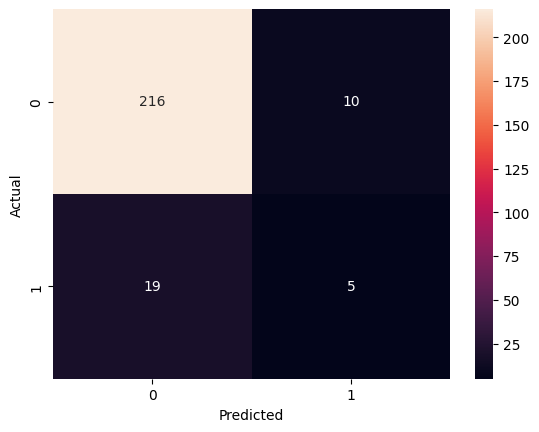

In [90]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_real, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [91]:

# Get the predicted probabilities for the logistic regression model
probs_logistic = logistic_model_big.predict_proba(X_test_big)

# Get the predicted probabilities for the second model
probs_model = model.predict(test_padded_sequences)

probs_logistic = np.array(probs_logistic[:, 1])
probs_model = np.array(probs_model)

# Set the weights for each model
weight_logistic = 0.8
weight_model = 0.2

# Calculate the weighted average probabilities
weighted_probs = [weight_logistic * probs_logistic[i] + weight_model * probs_model[i] for i in range(len(probs_logistic))]

# Set the threshold for the weighted probabilities
threshold = 0.6
weighted_probs = np.array(weighted_probs)
# Apply the threshold to get the final predictions
#print(weighted_probs)
predictions = np.where(weighted_probs >= threshold, 1, 0)

# Print the classification report
print(classification_report(Y_test_big, predictions, target_names=['Not Fraud', 'Fraud']))


8/8 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

   Not Fraud       0.95      0.96      0.95       226
       Fraud       0.57      0.54      0.55        24

    accuracy                           0.92       250
   macro avg       0.76      0.75      0.75       250
weighted avg       0.91      0.92      0.92       250



# **8. CUSTOMER PROFILE ANALYSIS**

In this section after creating our model we will still search for some customer behaviours in our data and we will draw customer profile analysis, considering how we could group our customers.

In [92]:
labels_summary

,purchase id,amount,Fraud,total_price,avg_price,min_price,max_price,median_price,total_time,avarage_time,...,category_Frozen foods,category_Breakfast cereals and spreads,"category_Dairy, vegetable and eggs","category_Sweets, biscuits, crisps and chocolate","category_Soft drinks, juices, coffee, tea",category_Snacks,category_Beer and aperitifs,"category_Potatoes, vegetables, fruit",more_than_avg,more_than_75
0,129,0.0,0,22.22,5.555000,2.29,9.49,5.220,126,31.500000,...,0,0,1,0,0,0,0,1,0,0
1,192,0.0,0,33.11,3.678889,0.99,6.99,2.990,1446,160.666667,...,0,1,0,0,0,1,0,0,1,1
2,195,0.0,0,4.48,2.240000,1.99,2.49,2.240,358,179.000000,...,1,0,0,0,0,1,0,0,1,1
3,203,0.0,0,18.25,3.650000,1.59,7.49,3.190,66,13.200000,...,0,2,0,0,0,0,0,0,0,0
4,547,0.0,0,8.08,2.693333,1.29,3.79,3.000,285,95.000000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,19381,0.0,0,33.41,6.682000,2.75,16.99,3.990,63,12.600000,...,0,2,0,0,0,0,0,0,0,0
246,19584,0.0,0,34.19,2.849167,0.77,10.43,1.990,1413,117.750000,...,2,0,1,1,0,1,1,0,1,0
247,19700,0.0,0,45.69,5.076667,0.89,21.37,2.790,1008,112.000000,...,2,0,1,1,0,0,2,0,1,0
248,19744,0.0,0,51.40,3.426667,1.29,7.49,2.900,2082,138.800000,...,1,2,1,2,1,0,1,1,1,1


In [93]:
labels_summary.columns

Index(['purchase id', 'amount', 'Fraud', 'total_price', 'avg_price',
       'min_price', 'max_price', 'median_price', 'total_time', 'avarage_time',
       'min_time', 'max_time', 'median_time', 'time_abnormality',
       'time_abnormality_median', 'max_time_abnormality', 'amount_of_products',
       'amount_of_categories', 'category_Baby and child',
       'category_Meat, chicken, fish, vega', 'category_Wine and bubbles',
       'category_Bakery and pastry', 'category_Pets',
       'category_Sports and dietary foods', 'category_Salads, pizza, meals',
       'category_Cheese, cold cuts, tapas',
       'category_Pasta, rice and world cuisine',
       'category_Soups, sauces, condiments, oils', 'category_Frozen foods',
       'category_Breakfast cereals and spreads',
       'category_Dairy, vegetable and eggs',
       'category_Sweets, biscuits, crisps and chocolate',
       'category_Soft drinks, juices, coffee, tea', 'category_Snacks',
       'category_Beer and aperitifs', 'category_Pot

In [94]:
transaction_summary.describe()

,purchase id,total_price,avg_price,min_price,max_price,median_price,total_time,avarage_time,min_time,max_time,...,category_Frozen foods,category_Breakfast cereals and spreads,"category_Dairy, vegetable and eggs","category_Sweets, biscuits, crisps and chocolate","category_Soft drinks, juices, coffee, tea",category_Snacks,category_Beer and aperitifs,"category_Potatoes, vegetables, fruit",more_than_avg,more_than_75
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,28.299437,3.689803,1.473825,8.810207,3.019105,786.109700,87.988391,40.331450,134.144900,...,0.44515,0.532500,0.411200,0.342650,0.39480,0.474750,0.362150,0.361900,0.347050,0.123750
std,5773.647028,23.869931,1.864972,1.032897,7.638046,1.514143,869.654643,50.709515,33.864378,81.907663,...,0.83787,0.806211,0.729823,0.712086,0.72915,0.772329,0.757975,0.671156,0.476044,0.329304
min,0.000000,0.490000,0.490000,0.250000,0.490000,0.490000,11.000000,7.666667,6.000000,9.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4999.750000,10.530000,2.655000,0.850000,4.490000,2.250000,180.000000,51.750000,22.000000,74.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9999.500000,20.030000,3.300000,1.290000,6.590000,2.740000,402.500000,80.000000,30.000000,117.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14999.250000,40.502500,4.193333,1.850000,8.980000,3.390000,1225.000000,114.835526,50.000000,186.000000,...,1.00000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
max,19999.000000,170.140000,39.990000,39.990000,39.990000,39.990000,6148.000000,763.000000,763.000000,1026.000000,...,11.00000,8.000000,8.000000,7.000000,10.00000,8.000000,12.000000,7.000000,1.000000,1.000000


In [95]:
transaction_summary

,purchase id,total_price,avg_price,min_price,max_price,median_price,total_time,avarage_time,min_time,max_time,...,category_Frozen foods,category_Breakfast cereals and spreads,"category_Dairy, vegetable and eggs","category_Sweets, biscuits, crisps and chocolate","category_Soft drinks, juices, coffee, tea",category_Snacks,category_Beer and aperitifs,"category_Potatoes, vegetables, fruit",more_than_avg,more_than_75
0,0,35.39,4.423750,1.39,15.49,2.570,927,115.875000,74,160,...,1,0,0,0,0,0,2,0,1,0
1,1,52.07,5.785556,1.25,24.99,2.990,154,17.111111,6,41,...,0,1,1,0,0,0,0,1,0,0
2,2,65.62,4.101250,1.39,19.99,2.725,2028,126.750000,66,196,...,0,2,0,2,0,1,1,1,1,0
3,3,8.86,2.215000,0.89,2.99,2.490,243,60.750000,16,81,...,1,0,0,0,0,2,0,0,0,0
4,4,7.38,3.690000,2.39,4.99,3.690,79,39.500000,36,43,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,41.65,3.203846,0.99,7.49,2.390,1478,113.692308,53,214,...,0,1,0,0,0,1,1,1,1,0
19996,19996,12.07,3.017500,1.99,3.90,3.090,175,43.750000,33,74,...,0,2,0,0,0,0,0,0,0,0
19997,19997,19.05,2.116667,0.89,4.90,1.900,750,83.333333,31,146,...,0,2,0,0,2,0,0,1,0,0
19998,19998,8.59,4.295000,3.69,4.90,4.295,94,47.000000,45,49,...,1,0,0,0,0,0,1,0,0,0


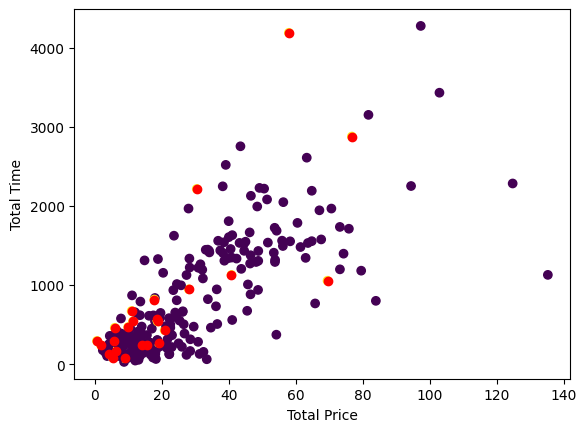

In [96]:
fraud = labels_summary['Fraud']

plt.scatter(labels_summary['total_price'], labels_summary['total_time'], c=fraud)
plt.scatter(labels_summary['total_price'][fraud == 1], labels_summary['total_time'][fraud == 1], c='red')

plt.xlabel('Total Price')
plt.ylabel('Total Time')


plt.show()

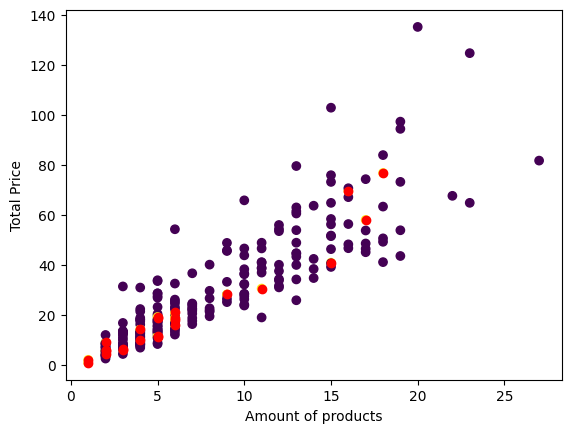

In [97]:
plt.scatter(labels_summary['amount_of_products'], labels_summary['total_price'], c=fraud)
plt.scatter(labels_summary['amount_of_products'][fraud == 1], labels_summary['total_price'][fraud == 1], c='red')

plt.xlabel('Amount of products')
plt.ylabel('Total Price')


plt.show()

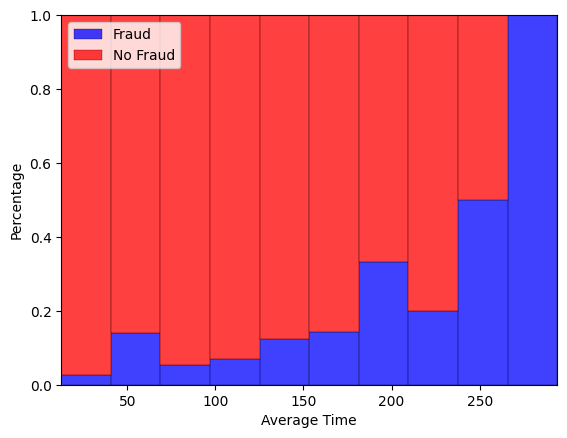

In [98]:
sns.histplot(data=labels_summary, x='avarage_time', hue='Fraud', palette=['red','blue'], multiple='fill', linewidth=0.2, bins=10, legend=['No Fraud', 'Fraud'])
plt.xlabel('Average Time')
plt.ylabel('Percentage')
plt.legend(loc='upper left', labels=['Fraud', 'No Fraud'])

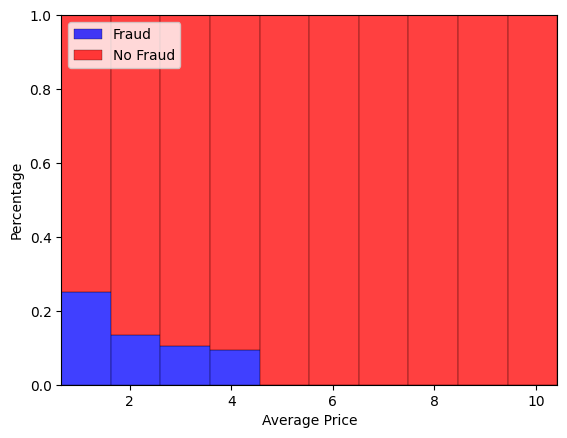

In [99]:
sns.histplot(data=labels_summary, x='avg_price', hue='Fraud', palette=['red','blue'], multiple='fill', linewidth=0.2, bins=10, legend=['No Fraud', 'Fraud'])
plt.xlabel('Average Price')
plt.ylabel('Percentage')
plt.legend(loc='upper left', labels=['Fraud', 'No Fraud'])

Now we will proceede with assosiation rule mining. 


In [ ]:
!pip install efficient-apriori

In [ ]:
from efficient_apriori import apriori
# Look for associations between individual products

data_frame_purchases_AR = data_frame_purchases.copy()

# Group data by purchase ID and aggregate product IDs
grouped_data = data_frame_purchases_AR.groupby('purchase id')['product id'].apply(list)
# Convert the aggregated data to a list of transactions
transactions = list(grouped_data)

min_support = 0.001  
min_confidence = 0.001  

itemsets, rules = apriori(transactions, min_support=min_support, min_confidence=min_confidence)

product_id_to_name = dict(zip(data_frame_products['id'], data_frame_products['product']))
# Print the frequent itemsets
print("Frequent Itemsets:")
for k, v in itemsets.items():
    print(f"{k}-itemsets:")
    for itemset, support in v.items():
        print(f"  {itemset} - support: {support}")


In [ ]:
# Print the association rules
print("\nAssociation Rules:")
for rule in rules:
    lhs_names = [product_id_to_name[item] for item in rule.lhs]
    rhs_names = [product_id_to_name[item] for item in rule.rhs]
    print(f"{lhs_names} -> {rhs_names} - support: {rule.support}, confidence: {rule.confidence}, lift: {rule.lift}")

# -> not very useful, few rules with low confidence

In [ ]:
# Instead of looking for specific products, rather look for what categories are frequently bought together

# Create a dictionary mapping product IDs to product sub categories
product_id_to_sub_category = dict(zip(data_frame_products['id'], data_frame_products['sub category']))

# Add a new column 'product name' to the purchases DataFrame
data_frame_purchases_AR['product name'] = data_frame_purchases_AR['product id'].map(product_id_to_name)
# Add a new column 'sub category' to the purchases DataFrame
data_frame_purchases_AR['sub category'] = data_frame_purchases_AR['product id'].map(product_id_to_sub_category)

# Group data by purchase ID and aggregate product IDs
grouped_data2 = data_frame_purchases_AR.groupby('purchase id')['sub category'].apply(list)
# Convert the aggregated data to a list of transactions
transactions_sub_category = list(grouped_data2)


min_support2 = 0.01  
min_confidence2 = 0.6  

itemsets, rules = apriori(transactions_sub_category, min_support=min_support2, min_confidence=min_confidence2)


# Print the frequent itemsets

print("Frequent Itemsets:")
for k, v in itemsets.items():
    print(f"{k}-itemsets:")
    for itemset, support in v.items():
        print(f"  {itemset} - support: {support}")

In [ ]:


# Print the association rules
print("\nAssociation Rules:")
for rule in rules:
    print(f"{rule.lhs} -> {rule.rhs} - support: {rule.support}, confidence: {rule.confidence}, lift: {rule.lift}")

# -> seems to be a lot more useful, quite some association rules with high confidence


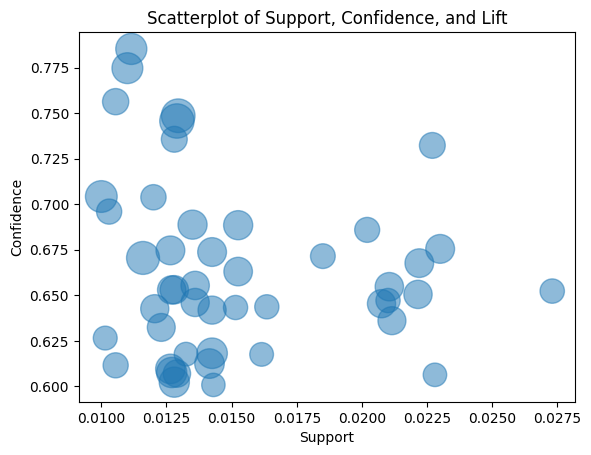

In [112]:
support = [rule.support for rule in rules]
confidence = [rule.confidence for rule in rules]
lift = [rule.lift for rule in rules]

plt.scatter(support, confidence, s=[l * 100 for l in lift], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Scatterplot of Support, Confidence, and Lift')
plt.show()


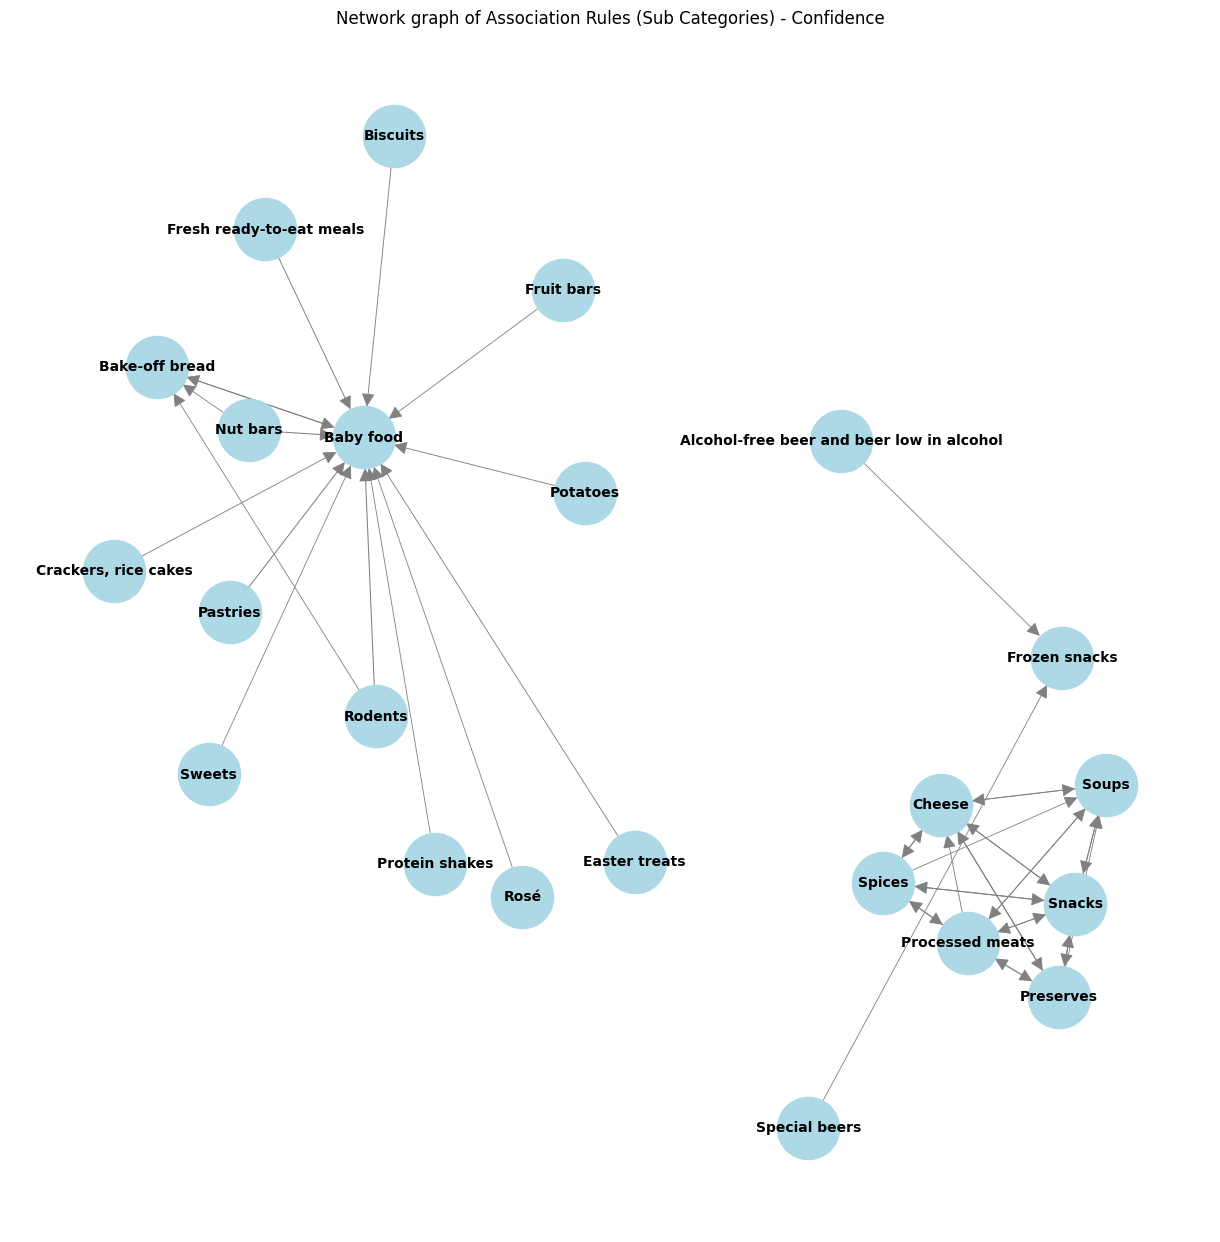

In [113]:

import networkx as nx

G = nx.DiGraph()

for rule in rules:
    lhs_names = list(rule.lhs)
    rhs_names = list(rule.rhs)
    for lhs in lhs_names:
        for rhs in rhs_names:
            G.add_edge(lhs, rhs, weight=rule.confidence)

edge_widths = [G[u][v]['weight'] for u, v in G.edges()]

pos = nx.spring_layout(G, seed=42, k=0.5)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_color='lightblue', with_labels=True, node_size=2000, font_size=10, font_weight='bold',
        width=edge_widths, edge_color='gray', arrowsize=20)
plt.title('Network graph of Association Rules (Sub Categories) - Confidence')
plt.show()

# **9. PREDICTIONS ON ACTUAL DATA - PIPELINE**

Right now we will prepare a pipeline which prepares raw data to be read by our model. We will create 2 file_prep function each for one of our model. Then we will join them and draw predictions. We need to remeber to have approximitely 100 transactions after prediction.

Code can run for some time, but key thing we need to remeber we are using our model on 1000 transaction at a same time. Prediction for one transaction would be much much faster, for sure less than a second.

In [100]:
def file_prep(file_path):
  data_frame_case = pd.read_csv(file_path)
  data_frame_case = data_frame_case.drop(data_frame_case.columns[0], axis=1)

  old_columns = data_frame_case.columns.tolist()
  data_frame_case.loc[len(data_frame_case)] = [int(old_columns[0]), int(old_columns[1]), int(old_columns[2])]

  new_columns = ["purchase id", "product id", "time"]
  data_frame_case.columns = new_columns 

  data_frame_case['scanning_abnormality'] = 0

  purchase_line = data_frame_case.iloc[0]
  product = purchase_line["product id"]
  category = data_frame_products.loc[data_frame_products['id'] == product, 'category'].values[0]

  index1 = times_between_categories_df[times_between_categories_df['categories'] == 'Entry'].index[0]
  index2 = times_between_categories_df.columns.get_loc(category)

  if purchase_line['time'] <= times_between_categories_df.iloc[index1,index2]:
    data_frame_case.loc[0]['scanning_abnormality'] = 0
  else:
    data_frame_case.loc[0]['scanning_abnormality'] = 1


  for i in range(1,len(data_frame_case)-1):
    purchase_line1 = data_frame_case.iloc[i]
    product1 = purchase_line1["product id"]
    category1 = data_frame_products.loc[data_frame_products['id'] == product1, 'category'].values[0]

    purchase_line2 = data_frame_case.iloc[i-1]
    product2 = purchase_line2["product id"]
    category2 = data_frame_products.loc[data_frame_products['id'] == product2, 'category'].values[0]
  
    if purchase_line1['purchase id'] == purchase_line2['purchase id']:
      index1 = times_between_categories_df[times_between_categories_df['categories'] == category1].index[0]
      index2 = times_between_categories_df.columns.get_loc(category2)

      if category1==category2: 
        data_frame_case.loc[i]['scanning_abnormality'] = 0

      else:
        if purchase_line1['time'] <= times_between_categories_df.iloc[index1,index2]:
          data_frame_case.loc[i]['scanning_abnormality'] = 0
        else:
          data_frame_case.loc[i]['scanning_abnormality'] = 1 
    else:
      index1 = times_between_categories_df[times_between_categories_df['categories'] == 'Entry'].index[0]
      index2 = times_between_categories_df.columns.get_loc(category1)

      if purchase_line1['time'] <= times_between_categories_df.iloc[index1,index2]:
        data_frame_case.loc[i]['scanning_abnormality'] = 0
      else:
        data_frame_case.loc[i]['scanning_abnormality'] = 1
    
  # Step 1: Filter the DataFrame for scanning abnormalities = 1
  abnormal_purchases = data_frame_case[data_frame_case['scanning_abnormality'] == 1]

  # Step 2: Group the filtered DataFrame by purchase_id
  grouped = abnormal_purchases.groupby('purchase id')

  # Step 3: Calculate the maximum time for each group
  max_time_per_purchase = grouped['time'].max()

  # Step 4: Reset the index
  max_time_per_purchase = max_time_per_purchase.reset_index()

  # Step 5: Left join with the original DataFrame and fill missing values with 0
  result = data_frame_case.merge(max_time_per_purchase, on='purchase id', how='left')


  result['time_y'] = result['time_y'].fillna(0)
  result = result.rename(columns={'time_x': 'time'})
  result


  case_info= pd.merge(result, data_frame_products,  how='left', left_on='product id', right_on='id') 
  case_info = case_info.drop('id', axis=1)

  categories_count_df = case_info.groupby("purchase id")["category"].nunique().reset_index().rename(columns={'category': 'amount_of_categories'})
  case_info = pd.merge(case_info, categories_count_df, on='purchase id') 
  case_info = pd.get_dummies(case_info, columns=['category'], prefix='category')

  transaction_summary = case_info.groupby('purchase id').agg(
  total_price=pd.NamedAgg(column='price', aggfunc='sum'),
  avg_price=pd.NamedAgg(column='price', aggfunc='mean'),
  min_price=pd.NamedAgg(column='price', aggfunc='min'),
  max_price=pd.NamedAgg(column='price', aggfunc='max'),
  median_price=pd.NamedAgg(column='price', aggfunc='median'),
  total_time=pd.NamedAgg(column='time', aggfunc='sum'),
  avarage_time=pd.NamedAgg(column='time', aggfunc='mean'),
  min_time=pd.NamedAgg(column='time', aggfunc='min'),
  max_time=pd.NamedAgg(column='time', aggfunc='max'),
  median_time=pd.NamedAgg(column='time', aggfunc='median'),
  time_abnormality = pd.NamedAgg(column='scanning_abnormality',aggfunc='mean'),
  time_abnormality_median = pd.NamedAgg(column='scanning_abnormality',aggfunc='median'),
  max_time_abnormality = pd.NamedAgg(column='time_y', aggfunc='max'),
  amount_of_products=pd.NamedAgg(column='purchase id', aggfunc='count'), 
  amount_of_categories=pd.NamedAgg(column='amount_of_categories', aggfunc='mean'),
  **{f'category_{i}': pd.NamedAgg(column=f'category_{i}', aggfunc='sum') for i in data_frame_products['category'].unique()}
  ).reset_index()

  mean_value = data_frame_purchases['time'].mean()
  percentile_75 = data_frame_purchases['time'].quantile(0.75)

  transaction_summary['more_than_avg'] = transaction_summary['avarage_time'].apply(
    lambda x: 1 if x > mean_value else 0)

  transaction_summary['more_than_75'] = transaction_summary['avarage_time'].apply(
    lambda x: 1 if x > percentile_75 else 0)

  
  return(transaction_summary)

In [101]:
def neural_file(file_path):
  neural_data = pd.read_csv(file_path)
  neural_data = neural_data.drop(neural_data.columns[0], axis=1)

  old_columns = neural_data.columns.tolist()
  neural_data.loc[len(neural_data)] = [int(old_columns[0]), int(old_columns[1]), int(old_columns[2])]

  new_columns = ["purchase id", "product id", "time"]
  neural_data.columns = new_columns 

  neural_data= pd.merge(neural_data, data_frame_products,  how='left', left_on='product id', right_on='id') 

  neural_data['time_diff'] = 0

  purchase_line = neural_data.iloc[0]
  product = purchase_line["product id"]
  category = data_frame_products.loc[data_frame_products['id'] == product, 'category'].values[0]

  index1 = times_between_categories_df_new[times_between_categories_df_new['categories'] == 'Entry'].index[0]
  index2 = times_between_categories_df_new.columns.get_loc(category)

  neural_data.loc[0,'time_diff'] = neural_data.loc[0,'time'] - times_between_categories_df_new.iloc[index1,index2]

  for i in range(1,len(neural_data)-1):
    purchase_line1 = neural_data.iloc[i]
    product1 = purchase_line1["product id"]
    category1 = data_frame_products.loc[data_frame_products['id'] == product1, 'category'].values[0]

    purchase_line2 = neural_data.iloc[i-1]
    product2 = purchase_line2["product id"]
    category2 = data_frame_products.loc[data_frame_products['id'] == product2, 'category'].values[0]
  
    if purchase_line1['purchase id'] == purchase_line2['purchase id']:
      index1 = times_between_categories_df_new[times_between_categories_df_new['categories'] == category1].index[0]
      index2 = times_between_categories_df_new.columns.get_loc(category2)

      neural_data.loc[i,'time_diff'] = neural_data.loc[i,'time'] - times_between_categories_df_new.iloc[index1,index2]

    else:
      index1 = times_between_categories_df_new[times_between_categories_df_new['categories'] == 'Entry'].index[0]
      index2 = times_between_categories_df_new.columns.get_loc(category1)
      neural_data.loc[i,'time_diff'] = neural_data.loc[i,'time'] - times_between_categories_df_new.iloc[index1,index2]
   

  neural_data['product id'], _ = pd.factorize(neural_data['product id'])
  neural_data['category'], _ = pd.factorize(neural_data['category'])
  neural_data['sub category'], _ = pd.factorize(neural_data['sub category'])

  neural_data_filtered = neural_data[['purchase id', 'time', 'category', 'sub category', 'price', 'time_diff', 'product id']]
  neural_grouped = neural_data_filtered .groupby('purchase id').apply(lambda group: group[['time', 'category', 'sub category', 'price', 'time_diff', 'product id']].values)
  neural_list = [group for group in neural_grouped]

  test_padded_sequences_new = pad_sequences(neural_list, dtype='float32', padding='post')

  return(test_padded_sequences_new)


In [102]:
dropped_prep = dropped1[1:]

In [114]:
def Prediction_pipeline(file_path):
  data_set=file_prep(file_path)
  neural_set=neural_file(file_path)
  data_normalized = data_set.copy()  # Create a copy of the original dataset
  
  # Apply normalization function to each column (except the first column)
  data_normalized.iloc[:, 1:] = data_normalized.iloc[:, 1:].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
  data_without_low_corr = data_normalized.drop(columns=dropped_prep)
  data_without_low_corr_np = data_without_low_corr.to_numpy()
  predicting_variables = data_without_low_corr_np[:,1:23]

  
  probs_logistic_pip = logistic_model_big.predict_proba(predicting_variables)

  probs_model_pip = model.predict(neural_set)

  probs_logistic_pip = np.array(probs_logistic_pip[:, 1])
  probs_model_pip = np.array(probs_model_pip)
  weight_logistic = 0.8
  weight_model = 0.2
  
  weighted_probs_pip = [weight_logistic * probs_logistic_pip[i] + weight_model * probs_model_pip[i] for i in range(len(probs_logistic_pip))]

  threshold = 0.7
  weighted_probs_pip = np.array(weighted_probs_pip)
  
  predictions = np.where(weighted_probs_pip >= threshold, 1, 0)
  
  purchase_ids = []

  for i in range(len(predictions)):
    # Check if the value at the current index is equal to 1
    if predictions[i] == 1:
        # Retrieve the purchase ID from the data frame using the index
        purchase_id = data_without_low_corr.loc[i, 'purchase id']
        purchase_ids.append(purchase_id)

  return purchase_ids

In [104]:
def print_output(list):
  for value in list:
    print(value)

In [ ]:
case_file = '/content/drive/MyDrive/case183.csv'

prediction_case= Prediction_pipeline(case_file)

#predictions_list=prediction_case.tolist()
print_output(prediction_case)

We check the length of our predictions. It should be around 100 with threshold from 0.6-0.7, depends on observation. With thresholds in this range we observed most promissing results and also there was approximetely 100 predictions on 1000 observations, which is what we are aming for.


In [116]:
print(len(prediction_case))

131
